In [5]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.util import mutual_info_distance
from pymodulon.io import load_json_model, save_to_json
import pandas as pd

# Load IcaData object

Todo:
- show clustering function and gzip thing in GA (P 1.0, P syringae)
- look into media iModulon cluster in PRECISE 2.0
- do clusters that have sigma factors have genes primarily regulated by that sigma factor?
- cluster names propagate to the clustermap
- cluster points in DIMCA should be red (second layer iteration: use plotly for sweet interactive stuff)

In [2]:
ica_data = load_json_model('../data/precise2/precise2.json.gz')

# Default Clustering

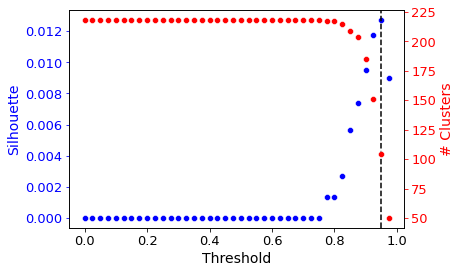

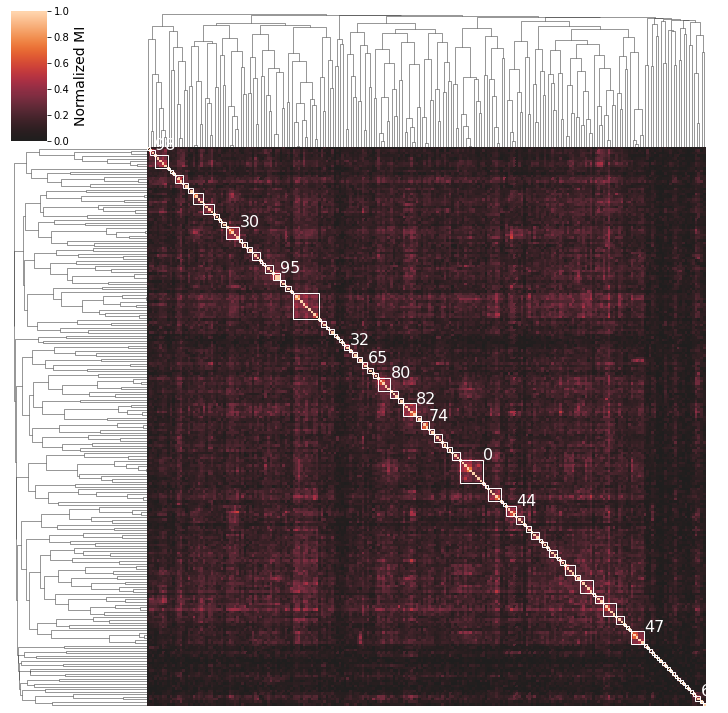

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.9500000000000001,
                         linkage='complete', n_clusters=None)]

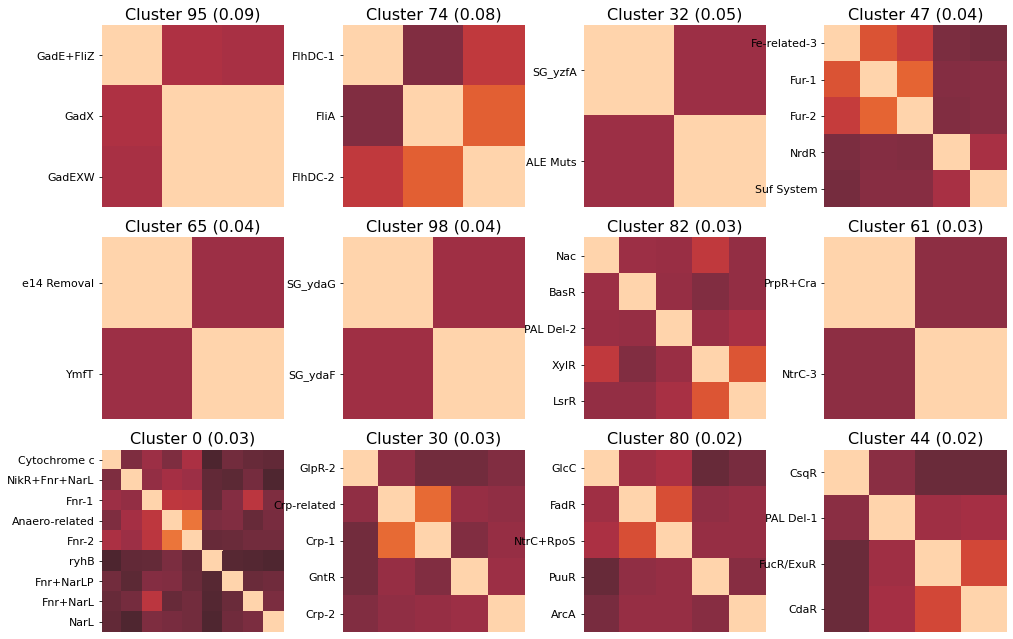

In [4]:
cluster_activities(ica_data, show_best_clusters=True, show_thresholding=True, correlation_method='mutual_info', n_best_clusters=12)

# Annotated Clusters

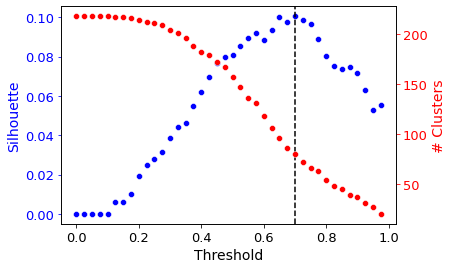

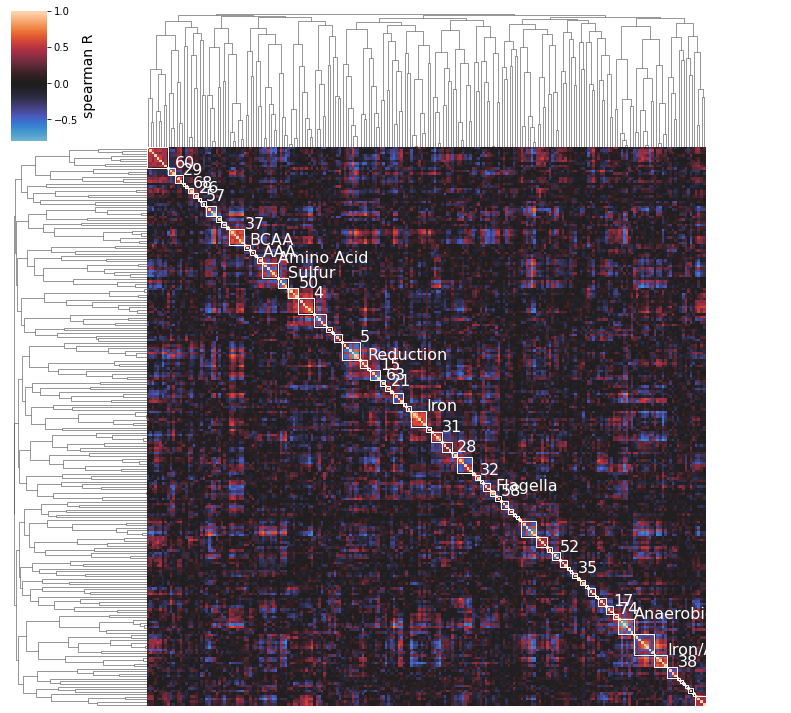

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.7000000000000001,
                         linkage='complete', n_clusters=None)]

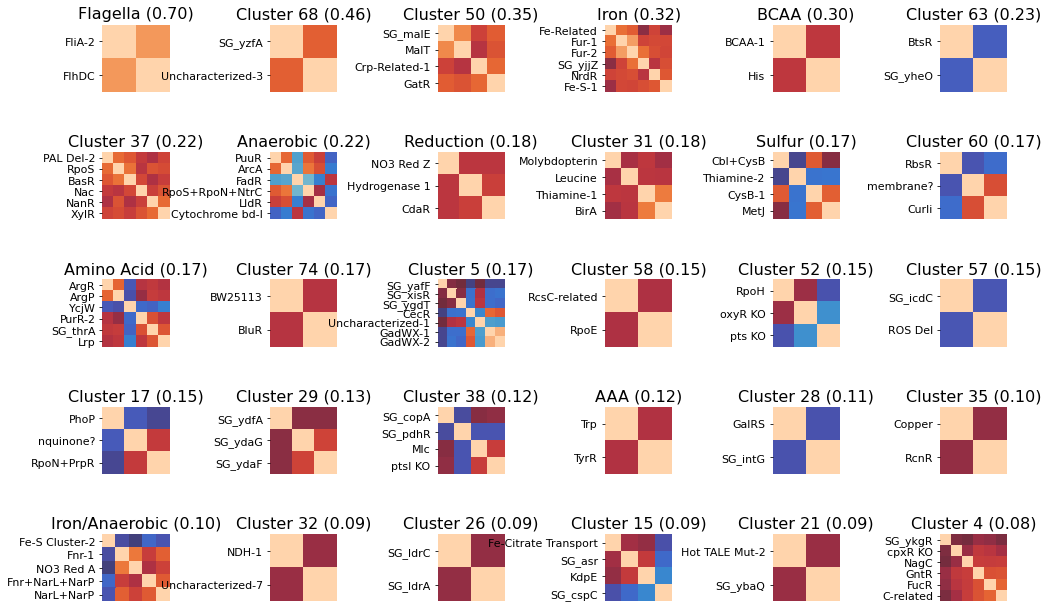

In [6]:
cluster_activities(ica_data, show_best_clusters=True, show_thresholding=True,
                  cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'})

# CCK Project

In [7]:
ica_data.sample_table['project'].unique()

array(['control', 'fur', 'acid', 'oxidative', 'nac_ntrc', 'misc', 'omics',
       'ompr', 'minspan', 'cra_crp', 'rpoB', 'crp', 'glu', '42c', 'ssw',
       'ica', 'ytf', 'fps', 'pal', 'efeU', 'misc2', 'nquinone', 'quinone',
       'oxyR', 'svns_pgi', 'abx_media', 'hot_tale', 'pdhr_ale', 'tcs',
       'ros_tale', 'pcoli', 'cck', 'cck_pgi', 'cck_sdh', 'cck_pts',
       'cck_gnd', 'cck_tpiA', 'acid_tale', 'adnB', 'ytf2', 'ytf3'],
      dtype=object)

In [8]:
cck_table = ica_data.sample_table[ica_data.sample_table['project'].isin(['cck', 'cck_pgi', 'cck_sdh', 'cck_pts',
       'cck_gnd', 'cck_tpiA'])]
cck_table

sample_id         study   project  \
ecoli_00716              cck__glu_ale4__1           CCK       cck   
ecoli_00717              cck__glu_ale4__2           CCK       cck   
ecoli_00718              cck__cck_ale1__1           CCK       cck   
ecoli_00719              cck__cck_ale1__2           CCK       cck   
ecoli_00720              cck__cck_ale2__1           CCK       cck   
ecoli_00721              cck__cck_ale2__2           CCK       cck   
ecoli_00722       cck_pgi__gmos_delpgi__1       CCK_pgi   cck_pgi   
ecoli_00723       cck_pgi__gmos_delpgi__2       CCK_pgi   cck_pgi   
ecoli_00724          cck_pgi__pgi_ale1__1       CCK_pgi   cck_pgi   
ecoli_00725          cck_pgi__pgi_ale1__2       CCK_pgi   cck_pgi   
ecoli_00727          cck_pgi__pgi_ale2__2       CCK_pgi   cck_pgi   
ecoli_00728          cck_pgi__pgi_ale3__1       CCK_pgi   cck_pgi   
ecoli_00729          cck_pgi__pgi_ale3__2       CCK_pgi   cck_pgi   
ecoli_00730          cck_pgi__pgi_ale4__1       CCK_pgi   cck_pgi   
ecoli_00731          cck_pgi__pgi_ale4__2       CCK_pgi   cck_pgi   
ecoli_00732          cck_pgi__pgi_ale4__3       CCK_pgi   cck_pgi   
ecoli_00733          cck_pgi__pgi_ale5__1       CCK_pgi   cck_pgi   
ecoli_00734          cck_pgi__pgi_ale5__2       CCK_pgi   cck_pgi   
ecoli_00735          cck_pgi__pgi_ale6__1       CCK_pgi   cck_pgi   
ecoli_00736          cck_pgi__pgi_ale6__2       CCK_pgi   cck_pgi   
ecoli_00737          cck_pgi__pgi_ale7__1       CCK_pgi   cck_pgi   
ecoli_00738          cck_pgi__pgi_ale7__2       CCK_pgi   cck_pgi   
ecoli_00739          cck_pgi__pgi_ale8__1       CCK_pgi   cck_pgi   
ecoli_00740          cck_pgi__pgi_ale8__2       CCK_pgi   cck_pgi   
ecoli_00741     cck_sdh__gmos_delsdhCB__1     CCK_sdhCB   cck_sdh   
ecoli_00742     cck_sdh__gmos_delsdhCB__2     CCK_sdhCB   cck_sdh   
ecoli_00743          cck_sdh__sdh_ale1__1     CCK_sdhCB   cck_sdh   
ecoli_00744          cck_sdh__sdh_ale1__2     CCK_sdhCB   cck_sdh   
ecoli_00745          cck_sdh__sdh_ale2__1     CCK_sdhCB   cck_sdh   
ecoli_00746          cck_sdh__sdh_ale3__2     CCK_sdhCB   cck_sdh   
ecoli_00747          cck_sdh__sdh_ale3__1     CCK_sdhCB   cck_sdh   
ecoli_00748          cck_sdh__sdh_ale3__3     CCK_sdhCB   cck_sdh   
ecoli_00749  cck_pts__gmos_delptsHIcrr__2  CCK_ptsHIcrr   cck_pts   
ecoli_00750  cck_pts__gmos_delptsHIcrr__1  CCK_ptsHIcrr   cck_pts   
ecoli_00751          cck_pts__pts_ale1__2  CCK_ptsHIcrr   cck_pts   
ecoli_00752          cck_pts__pts_ale1__1  CCK_ptsHIcrr   cck_pts   
ecoli_00753          cck_pts__pts_ale2__2  CCK_ptsHIcrr   cck_pts   
ecoli_00754          cck_pts__pts_ale2__1  CCK_ptsHIcrr   cck_pts   
ecoli_00755          cck_pts__pts_ale3__2  CCK_ptsHIcrr   cck_pts   
ecoli_00756          cck_pts__pts_ale3__1  CCK_ptsHIcrr   cck_pts   
ecoli_00757          cck_pts__pts_ale4__2  CCK_ptsHIcrr   cck_pts   
ecoli_00758          cck_pts__pts_ale4__1  CCK_ptsHIcrr   cck_pts   
ecoli_00759       cck_gnd__gmos_delgnd__1       CCK_gnd   cck_gnd   
ecoli_00760       cck_gnd__gmos_delgnd__2       CCK_gnd   cck_gnd   
ecoli_00761          cck_gnd__gnd_ale1__1       CCK_gnd   cck_gnd   
ecoli_00762          cck_gnd__gnd_ale1__2       CCK_gnd   cck_gnd   
ecoli_00763          cck_gnd__gnd_ale2__1       CCK_gnd   cck_gnd   
ecoli_00764          cck_gnd__gnd_ale2__2       CCK_gnd   cck_gnd   
ecoli_00765          cck_gnd__gnd_ale3__1       CCK_gnd   cck_gnd   
ecoli_00766          cck_gnd__gnd_ale3__2       CCK_gnd   cck_gnd   
ecoli_00767     cck_tpiA__gmos_deltpiA__1      CCK_tpiA  cck_tpiA   
ecoli_00768     cck_tpiA__gmos_deltpiA__2      CCK_tpiA  cck_tpiA   
ecoli_00769        cck_tpiA__tpiA_ale1__1      CCK_tpiA  cck_tpiA   
ecoli_00770        cck_tpiA__tpiA_ale1__2      CCK_tpiA  cck_tpiA   
ecoli_00771        cck_tpiA__tpiA_ale2__1      CCK_tpiA  cck_tpiA   
ecoli_00772        cck_tpiA__tpiA_ale2__2      CCK_tpiA  cck_tpiA   
ecoli_00773        cck_tpiA__tpiA_ale3__1      CCK_tpiA  cck_tpiA   
ecoli_00774        cck_tpiA__t

In [10]:
cck_wt_evolved = ['ecoli_00716', 'ecoli_00717']

## PGI

In [7]:
cck_table[cck_table['project'] == 'cck_pgi']

sample_id    study  project    condition  rep_id  \
ecoli_00722  cck_pgi__gmos_delpgi__1  CCK_pgi  cck_pgi  gmos_delpgi       1   
ecoli_00723  cck_pgi__gmos_delpgi__2  CCK_pgi  cck_pgi  gmos_delpgi       2   
ecoli_00724     cck_pgi__pgi_ale1__1  CCK_pgi  cck_pgi     pgi_ale1       1   
ecoli_00725     cck_pgi__pgi_ale1__2  CCK_pgi  cck_pgi     pgi_ale1       2   
ecoli_00727     cck_pgi__pgi_ale2__2  CCK_pgi  cck_pgi     pgi_ale2       2   
ecoli_00728     cck_pgi__pgi_ale3__1  CCK_pgi  cck_pgi     pgi_ale3       1   
ecoli_00729     cck_pgi__pgi_ale3__2  CCK_pgi  cck_pgi     pgi_ale3       2   
ecoli_00730     cck_pgi__pgi_ale4__1  CCK_pgi  cck_pgi     pgi_ale4       1   
ecoli_00731     cck_pgi__pgi_ale4__2  CCK_pgi  cck_pgi     pgi_ale4       2   
ecoli_00732     cck_pgi__pgi_ale4__3  CCK_pgi  cck_pgi     pgi_ale4       3   
ecoli_00733     cck_pgi__pgi_ale5__1  CCK_pgi  cck_pgi     pgi_ale5       1   
ecoli_00734     cck_pgi__pgi_ale5__2  CCK_pgi  cck_pgi     pgi_ale5       2   
ecoli_00735     cck_pgi__pgi_ale6__1  CCK_pgi  cck_pgi     pgi_ale6       1   
ecoli_00736     cck_pgi__pgi_ale6__2  CCK_pgi  cck_pgi     pgi_ale6       2   
ecoli_00737     cck_pgi__pgi_ale7__1  CCK_pgi  cck_pgi     pgi_ale7       1   
ecoli_00738     cck_pgi__pgi_ale7__2  CCK_pgi  cck_pgi     pgi_ale7       2   
ecoli_00739     cck_pgi__pgi_ale8__1  CCK_pgi  cck_pgi     pgi_ale8       1   
ecoli_00740     cck_pgi__pgi_ale8__2  CCK_pgi  cck_pgi     pgi_ale8       2   

                       contact            creator run_date  \
ecoli_00722  Douglas McCloskey  Douglas McCloskey  7/17/14   
ecoli_00723  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00724  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00725  Douglas McCloskey  Douglas McCloskey  7/28/14   
ecoli_00727  Douglas McCloskey  Douglas McCloskey  7/28/14   
ecoli_00728  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00729  Douglas McCloskey  Douglas McCloskey  7/30/14   
ecoli_00730  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00731  Douglas McCloskey  Douglas McCloskey  7/30/14   
ecoli_00732  Douglas McCloskey  Douglas McCloskey  7/30/14   
ecoli_00733  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00734  Douglas McCloskey  Douglas McCloskey  7/31/14   
ecoli_00735  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00736  Douglas McCloskey  Douglas McCloskey  7/31/14   
ecoli_00737  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00738  Douglas McCloskey  Douglas McCloskey   8/1/14   
ecoli_00739  Douglas McCloskey  Douglas McCloskey     None   
ecoli_00740  Douglas McCloskey  Douglas McCloskey   8/1/14   

                               Strain Description Strain  ... Notes  \
ecoli_00722  Escherichia coli GLU.4.403.1 del_pgi   GMOS  ...  None   
ecoli_00723  Escherichia coli GLU.4.403.1 del_pgi   GMOS  ...  None   
ecoli_00724      Escherichia coli CCK_PGI.1.113.0   GMOS  ...  None   
ecoli_00725      Escherichia coli CCK_PGI.1.113.0   GMOS  ...  None   
ecoli_00727      Escherichia coli CCK_PGI.2.107.0   GMOS  ...  None   
ecoli_00728      Escherichia coli CCK_PGI.3.108.0   GMOS  ...  None   
ecoli_00729      Escherichia coli CCK_PGI.3.108.0   GMOS  ...  None   
ecoli_00730      Escherichia coli CCK_PGI.4.111.0   GMOS  ...  None   
ecoli_00731      Escherichia coli CCK_PGI.4.111.0   GMOS  ...  None   
ecoli_00732      Escherichia coli CCK_PGI.4.111.0   GMOS  ...  None   
ecoli_00733      Escherichia coli CCK_PGI.5.109.0   GMOS  ...  None   
ecoli_00734      Escherichia coli CCK_PGI.5.109.0   GMOS  ...  None   
ecoli_00735      Escherichia coli CCK_PGI.6.110.0   GMOS  ...  None   
ecoli_00736      Escherichia coli CCK_PGI.6.110.0   GMOS  ...  None   
ecoli_00737       Escherichia coli CCK_PGI.7.97.0   GMOS  ...  None   
ecoli_00738       Escherichia coli CCK_PGI.7.97.0   GMOS  ...  None   
ecoli_00739      Escherichia coli CCK_PGI.8.110.0   GMOS  ...  None   
ecoli_00740      Escherichia coli CCK_PGI.8.110.0   GMOS  ...  None 

### Comparing Glu-Evolved to PGI KO

Text(0.5, 1.0, 'pgi KO - DIMCA')

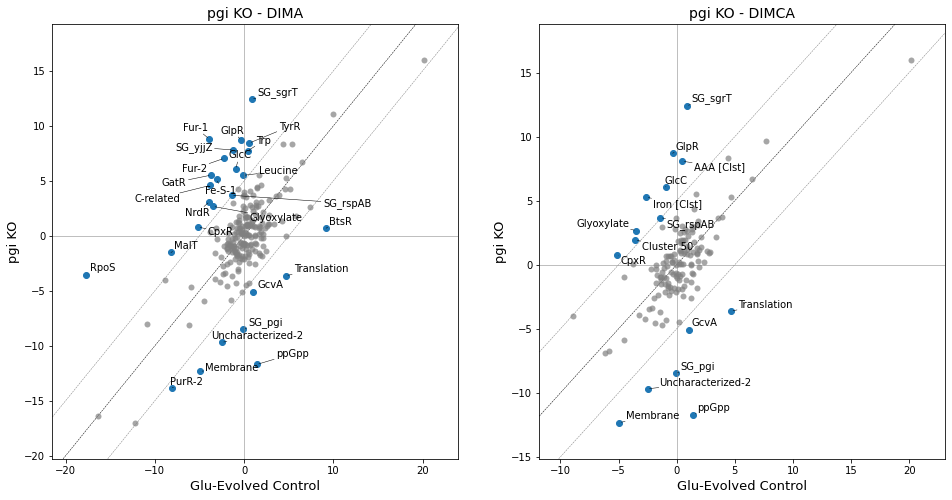

In [11]:
_, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


plot_dima(ica_data, cck_wt_evolved, 'cck_pgi:gmos_delpgi', ax=ax_dima)
ax_dima.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dima.set_ylabel('pgi KO', fontsize=13)
ax_dima.set_title('pgi KO - DIMA', fontsize=14)

cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                  cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                  dimca_sample1=cck_wt_evolved, dimca_sample2='cck_pgi:gmos_delpgi',
                  ax=ax_dimca)

ax_dimca.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dimca.set_ylabel('pgi KO', fontsize=13)
ax_dimca.set_title('pgi KO - DIMCA', fontsize=14)

### Evolved PGI Deletions

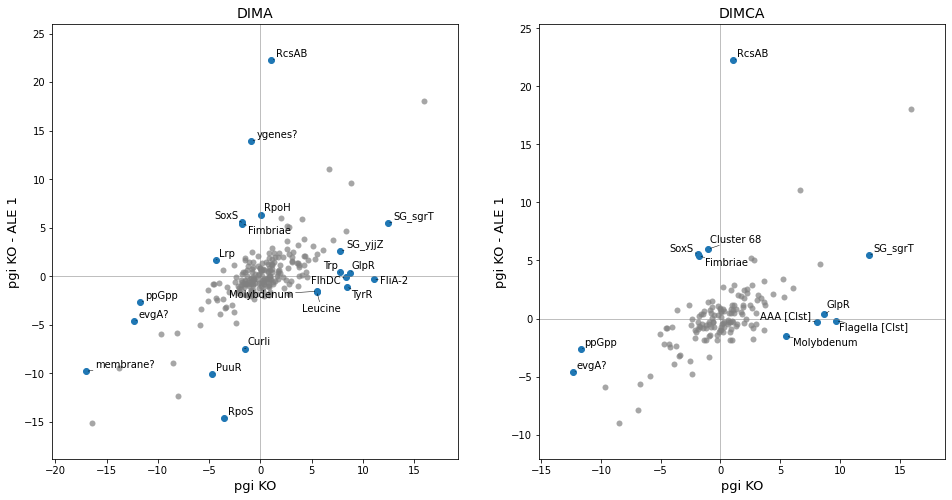

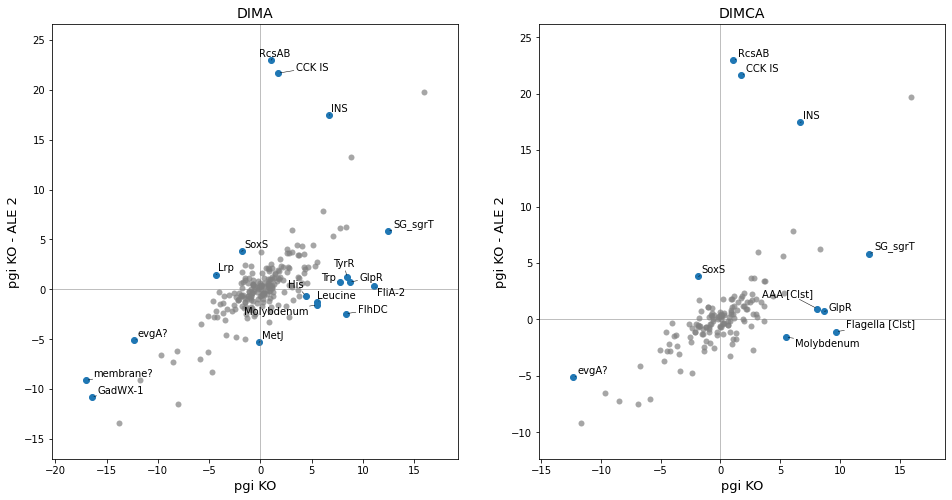

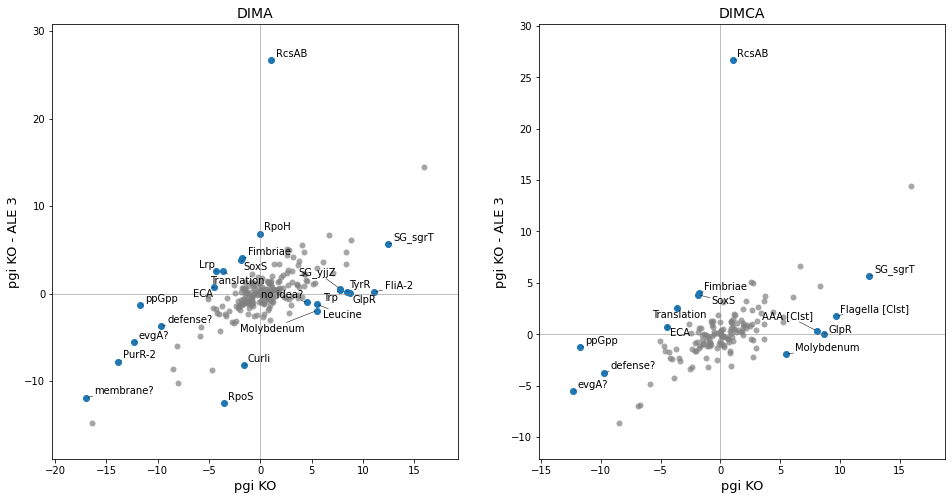

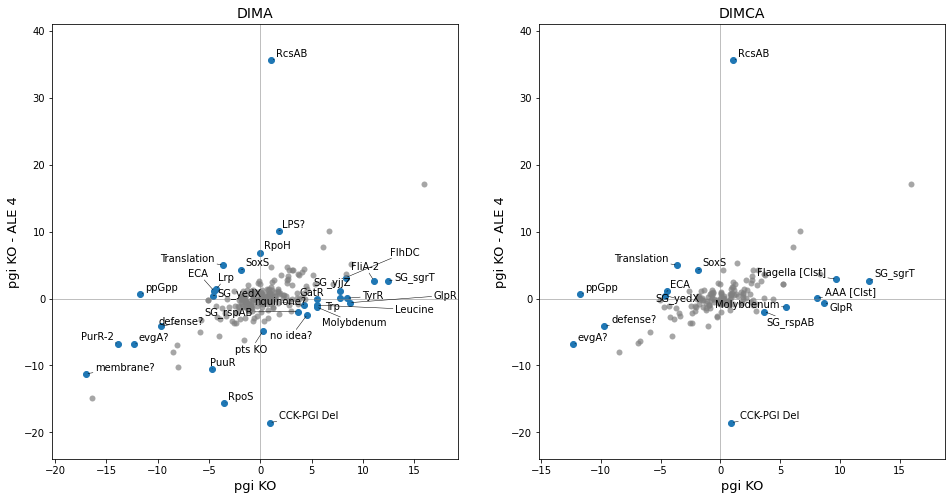

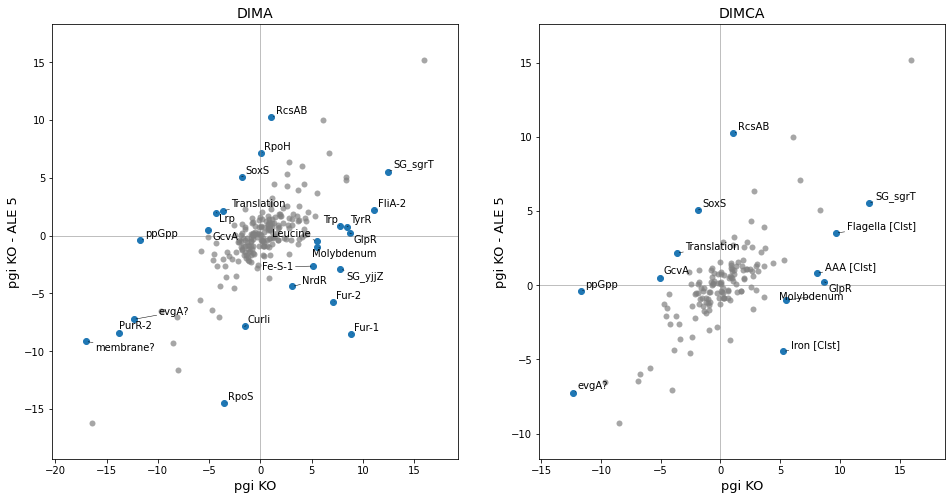

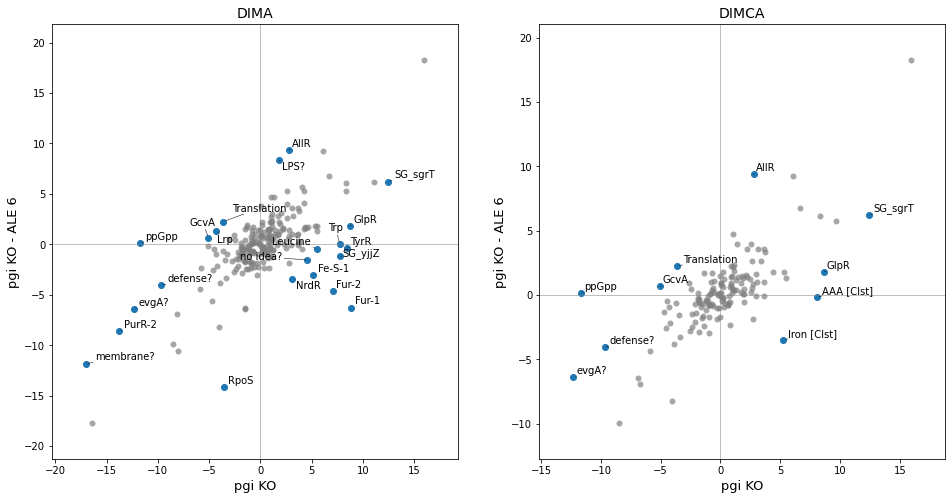

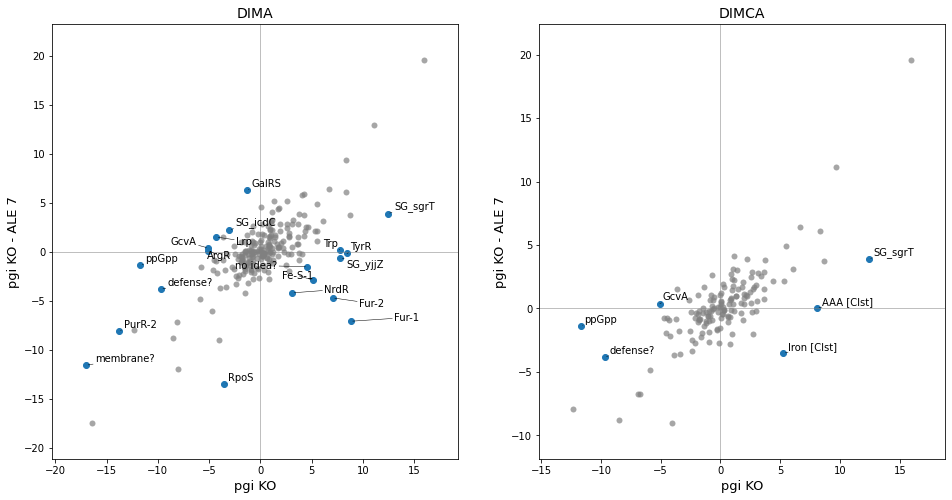

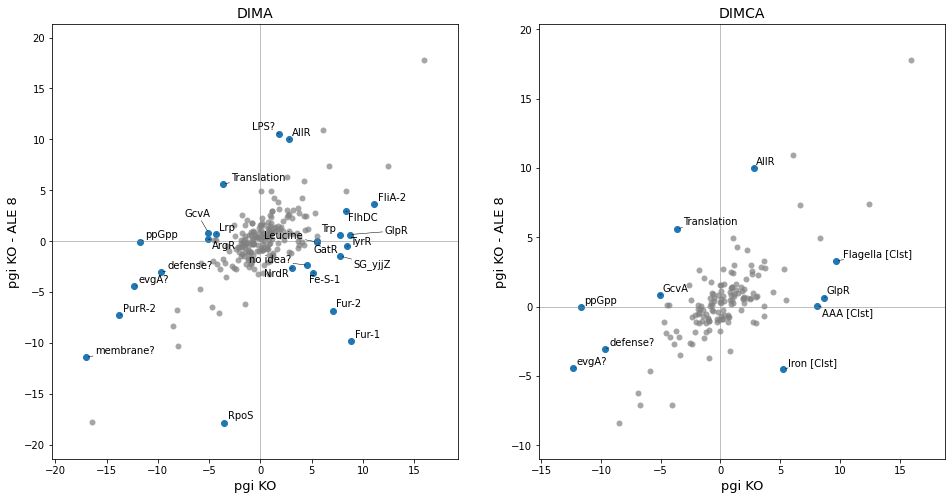

In [23]:
for i in range(1, 9):

    _, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


    plot_dima(ica_data, 'cck_pgi:gmos_delpgi', f'cck_pgi:pgi_ale{i}', ax=ax_dima)
    ax_dima.set_xlabel('pgi KO', fontsize=13)
    ax_dima.set_ylabel(f'pgi KO - ALE {i}', fontsize=13)
    ax_dima.set_title(f'DIMA', fontsize=14)

    cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                      cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                    13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                      dimca_sample1='cck_pgi:gmos_delpgi', dimca_sample2=f'cck_pgi:pgi_ale{i}',
                      ax=ax_dimca)

    ax_dimca.set_xlabel('pgi KO', fontsize=13)
    ax_dimca.set_ylabel(f'pgi KO - ALE {i}', fontsize=13)
    ax_dimca.set_title('DIMCA', fontsize=14)
    
    plt.show()

## SDH

In [24]:
cck_table[cck_table['project'] == 'cck_sdh']

sample_id      study  project      condition  \
ecoli_00741  cck_sdh__gmos_delsdhCB__1  CCK_sdhCB  cck_sdh  gmos_delsdhCB   
ecoli_00742  cck_sdh__gmos_delsdhCB__2  CCK_sdhCB  cck_sdh  gmos_delsdhCB   
ecoli_00743       cck_sdh__sdh_ale1__1  CCK_sdhCB  cck_sdh       sdh_ale1   
ecoli_00744       cck_sdh__sdh_ale1__2  CCK_sdhCB  cck_sdh       sdh_ale1   
ecoli_00745       cck_sdh__sdh_ale2__1  CCK_sdhCB  cck_sdh       sdh_ale2   
ecoli_00746       cck_sdh__sdh_ale3__2  CCK_sdhCB  cck_sdh       sdh_ale3   
ecoli_00747       cck_sdh__sdh_ale3__1  CCK_sdhCB  cck_sdh       sdh_ale3   
ecoli_00748       cck_sdh__sdh_ale3__3  CCK_sdhCB  cck_sdh       sdh_ale3   

             rep_id            contact            creator run_date  \
ecoli_00741       1  Douglas McCloskey  Douglas McCloskey  7/16/14   
ecoli_00742       2  Douglas McCloskey  Douglas McCloskey  7/16/14   
ecoli_00743       1  Douglas McCloskey  Douglas McCloskey  8/13/14   
ecoli_00744       2  Douglas McCloskey  Douglas McCloskey  8/13/14   
ecoli_00745       1  Douglas McCloskey  Douglas McCloskey  8/14/14   
ecoli_00746       2  Douglas McCloskey  Douglas McCloskey  8/14/14   
ecoli_00747       1  Douglas McCloskey  Douglas McCloskey  8/14/14   
ecoli_00748       3  Douglas McCloskey  Douglas McCloskey  8/14/14   

                                         Strain Description Strain  ... Notes  \
ecoli_00741  Escherichia coli GLU.4.403.1 del_sdhC del_sdhB   GMOS  ...  None   
ecoli_00742  Escherichia coli GLU.4.403.1 del_sdhC del_sdhB   GMOS  ...  None   
ecoli_00743                Escherichia coli CCK_SDH.1.176.0   GMOS  ...  None   
ecoli_00744                Escherichia coli CCK_SDH.1.176.0   GMOS  ...  None   
ecoli_00745                Escherichia coli CCK_SDH.2.178.0   GMOS  ...  None   
ecoli_00746                Escherichia coli CCK_SDH.3.176.0   GMOS  ...  None   
ecoli_00747                Escherichia coli CCK_SDH.3.176.0   GMOS  ...  None   
ecoli_00748                Escherichia coli CCK_SDH.3.176.0   GMOS  ...  None   

            LibraryLayout  Platform passed_fastqc passed_pct_reads_mapped  \
ecoli_00741        SINGLE  ILLUMINA          True                    True   
ecoli_00742        SINGLE  ILLUMINA          True                    True   
ecoli_00743        SINGLE  ILLUMINA          True                    True   
ecoli_00744        SINGLE  ILLUMINA          True                    True   
ecoli_00745        SINGLE  ILLUMINA          True                    True   
ecoli_00746        SINGLE  ILLUMINA          True                    True   
ecoli_00747        SINGLE  ILLUMINA          True                    True   
ecoli_00748        SINGLE  ILLUMINA          True                    True   

            passed_reads_mapped_to_CDS  passed_global_correlation  \
ecoli_00741                       True                       True   
ecoli_00742                       True                       True   
ecoli_00743                       True                       True   
ecoli_00744                       True                       True   
ecoli_00745                       True                       True   
ecoli_00746                       True                       True   
ecoli_00747                       True                       True   
ecoli_00748                       True                       True   

                         full_name passed_similar_replicates  \
ecoli_00741  cck_sdh:gmos_delsdhCB                      True   
ecoli_00742  cck_sdh:gmos_delsdhCB                      True   
ecoli_00743       cck_sdh:sdh_ale1                      True   
ecoli_00744       cck_sdh:sdh_ale1                      True   
ecoli_00745       cck_sdh:sdh_ale2                      True   
ecoli_00746       cck_sdh:sdh_ale3                      True   
ecoli_00747       cck_sdh:sdh_ale3                      True   
ecoli_00748       cck_sdh:sdh_ale3                      True   

            passed_number_replicates  
ecoli_00741                     True  
eco

### Comparing Glu-Evolved to SDH KO

Text(0.5, 1.0, 'sdh KO - DIMCA')

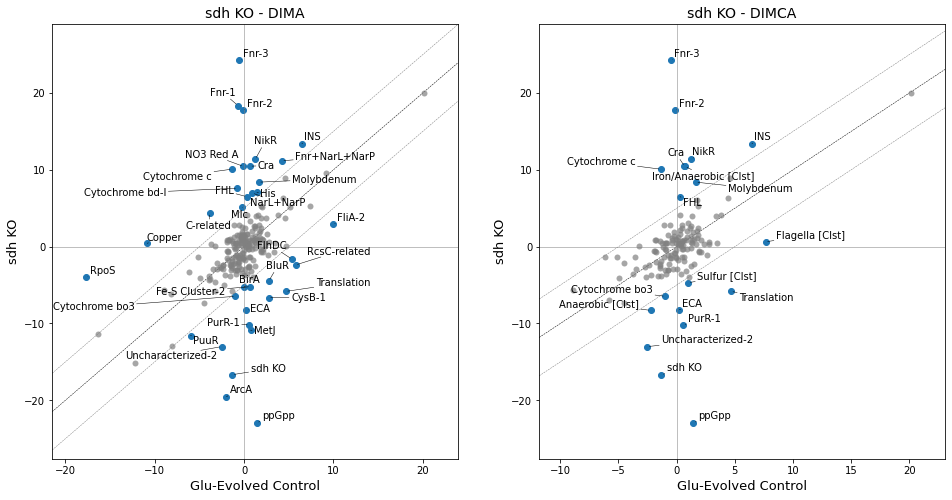

In [12]:
_, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


plot_dima(ica_data, cck_wt_evolved, 'cck_sdh:gmos_delsdhCB', ax=ax_dima)
ax_dima.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dima.set_ylabel('sdh KO', fontsize=13)
ax_dima.set_title('sdh KO - DIMA', fontsize=14)

cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                  cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                  dimca_sample1=cck_wt_evolved, dimca_sample2='cck_sdh:gmos_delsdhCB',
                  ax=ax_dimca)

ax_dimca.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dimca.set_ylabel('sdh KO', fontsize=13)
ax_dimca.set_title('sdh KO - DIMCA', fontsize=14)

### Evolved SDH Deletions

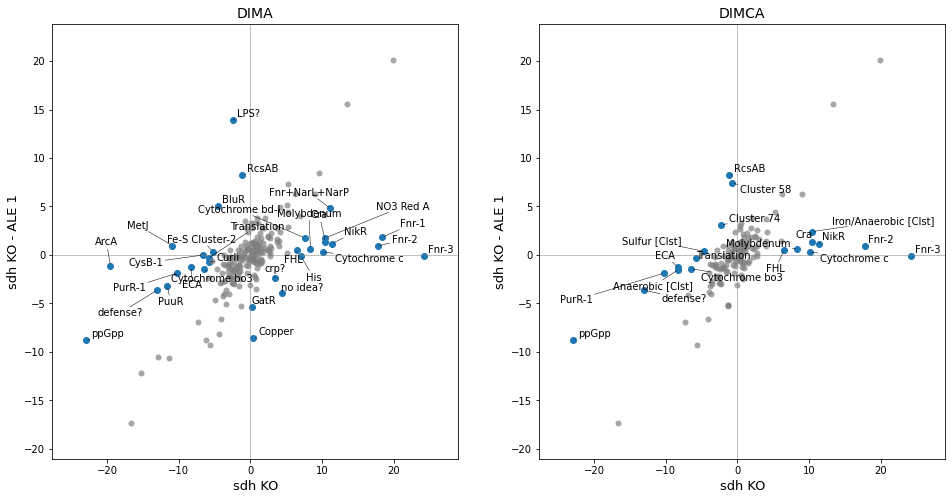

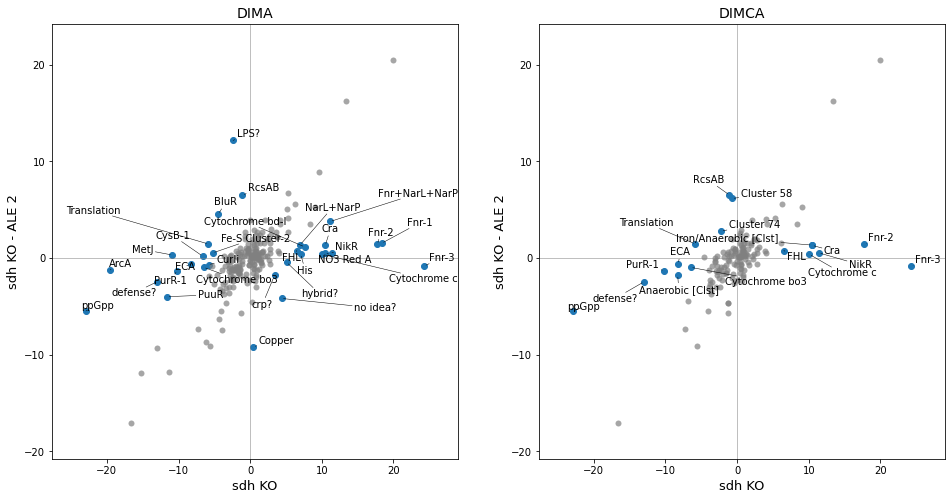

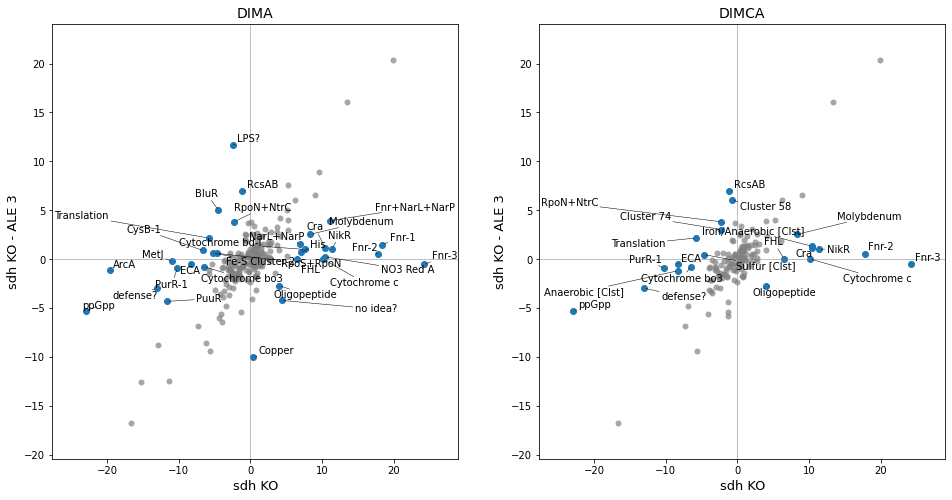

In [29]:
for i in range(1, 4):

    _, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


    plot_dima(ica_data, 'cck_sdh:gmos_delsdhCB', f'cck_sdh:sdh_ale{i}', ax=ax_dima)
    ax_dima.set_xlabel('sdh KO', fontsize=13)
    ax_dima.set_ylabel(f'sdh KO - ALE {i}', fontsize=13)
    ax_dima.set_title(f'DIMA', fontsize=14)

    cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                      cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                    13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                      dimca_sample1='cck_sdh:gmos_delsdhCB', dimca_sample2=f'cck_sdh:sdh_ale{i}',
                      ax=ax_dimca)

    ax_dimca.set_xlabel('sdh KO', fontsize=13)
    ax_dimca.set_ylabel(f'sdh KO - ALE {i}', fontsize=13)
    ax_dimca.set_title('DIMCA', fontsize=14)
    
    plt.show()

## PTS

In [30]:
cck_table[cck_table['project'] == 'cck_pts']

sample_id         study  project  \
ecoli_00749  cck_pts__gmos_delptsHIcrr__2  CCK_ptsHIcrr  cck_pts   
ecoli_00750  cck_pts__gmos_delptsHIcrr__1  CCK_ptsHIcrr  cck_pts   
ecoli_00751          cck_pts__pts_ale1__2  CCK_ptsHIcrr  cck_pts   
ecoli_00752          cck_pts__pts_ale1__1  CCK_ptsHIcrr  cck_pts   
ecoli_00753          cck_pts__pts_ale2__2  CCK_ptsHIcrr  cck_pts   
ecoli_00754          cck_pts__pts_ale2__1  CCK_ptsHIcrr  cck_pts   
ecoli_00755          cck_pts__pts_ale3__2  CCK_ptsHIcrr  cck_pts   
ecoli_00756          cck_pts__pts_ale3__1  CCK_ptsHIcrr  cck_pts   
ecoli_00757          cck_pts__pts_ale4__2  CCK_ptsHIcrr  cck_pts   
ecoli_00758          cck_pts__pts_ale4__1  CCK_ptsHIcrr  cck_pts   

                    condition  rep_id            contact            creator  \
ecoli_00749  gmos_delptsHIcrr       2  Douglas McCloskey  Douglas McCloskey   
ecoli_00750  gmos_delptsHIcrr       1  Douglas McCloskey  Douglas McCloskey   
ecoli_00751          pts_ale1       2  Douglas McCloskey  Douglas McCloskey   
ecoli_00752          pts_ale1       1  Douglas McCloskey  Douglas McCloskey   
ecoli_00753          pts_ale2       2  Douglas McCloskey  Douglas McCloskey   
ecoli_00754          pts_ale2       1  Douglas McCloskey  Douglas McCloskey   
ecoli_00755          pts_ale3       2  Douglas McCloskey  Douglas McCloskey   
ecoli_00756          pts_ale3       1  Douglas McCloskey  Douglas McCloskey   
ecoli_00757          pts_ale4       2  Douglas McCloskey  Douglas McCloskey   
ecoli_00758          pts_ale4       1  Douglas McCloskey  Douglas McCloskey   

            run_date                                 Strain Description  \
ecoli_00749  7/18/14  Escherichia coli GLU.4.403.1 del_ptsH del_ptsI...   
ecoli_00750  7/18/14  Escherichia coli GLU.4.403.1 del_ptsH del_ptsI...   
ecoli_00751   8/4/14                   Escherichia coli CCK_PTS.1.131.0   
ecoli_00752   8/4/14                   Escherichia coli CCK_PTS.1.131.0   
ecoli_00753   8/4/14                   Escherichia coli CCK_PTS.2.135.0   
ecoli_00754   8/4/14                   Escherichia coli CCK_PTS.2.135.0   
ecoli_00755   8/5/14                   Escherichia coli CCK_PTS.3.138.0   
ecoli_00756   8/5/14                   Escherichia coli CCK_PTS.3.138.0   
ecoli_00757   8/5/14                   Escherichia coli CCK_PTS.4.142.0   
ecoli_00758   8/5/14                   Escherichia coli CCK_PTS.4.142.0   

            Strain  ... Notes LibraryLayout  Platform passed_fastqc  \
ecoli_00749   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00750   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00751   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00752   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00753   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00754   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00755   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00756   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00757   GMOS  ...  None        SINGLE  ILLUMINA          True   
ecoli_00758   GMOS  ...  None        SINGLE  ILLUMINA          True   

            passed_pct_reads_mapped passed_reads_mapped_to_CDS  \
ecoli_00749                    True                       True   
ecoli_00750                    True                       True   
ecoli_00751                    True                       True   
ecoli_00752                    True                       True   
ecoli_00753                    True                       True   
ecoli_00754                    True                       True   
ecoli_00755                    True                       True   
ecoli_00756                    True                       True   
ecoli_00757                    True                       True   
ecoli_00758                    True                       True   

             passed_global_correlation                 full_name  \
ecoli_0074

### Comparing Glu-Evolved to PTS KO

Text(0.5, 1.0, 'PTS KO - DIMCA')

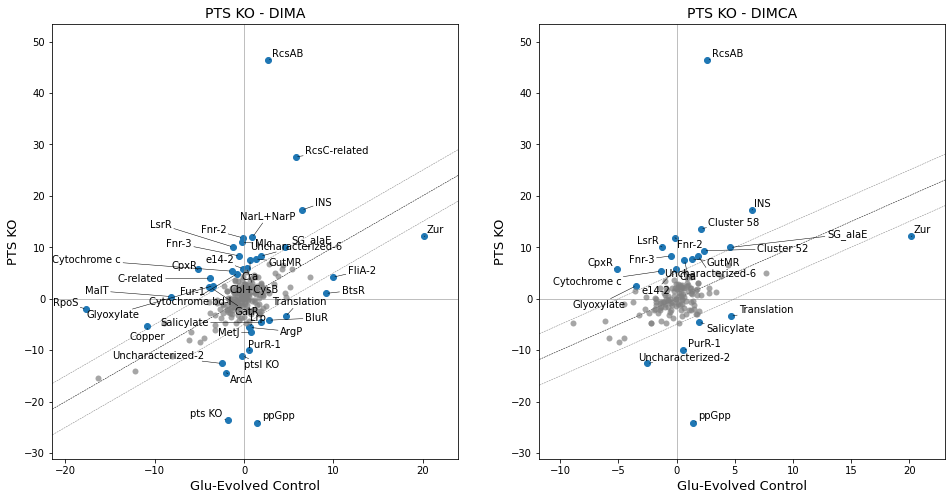

In [13]:
_, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


plot_dima(ica_data, cck_wt_evolved, 'cck_pts:gmos_delptsHIcrr', ax=ax_dima)
ax_dima.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dima.set_ylabel('PTS KO', fontsize=13)
ax_dima.set_title('PTS KO - DIMA', fontsize=14)

cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                  cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                  dimca_sample1=cck_wt_evolved, dimca_sample2='cck_pts:gmos_delptsHIcrr',
                  ax=ax_dimca)

ax_dimca.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dimca.set_ylabel('PTS KO', fontsize=13)
ax_dimca.set_title('PTS KO - DIMCA', fontsize=14)

### Evolved PTS Deletions

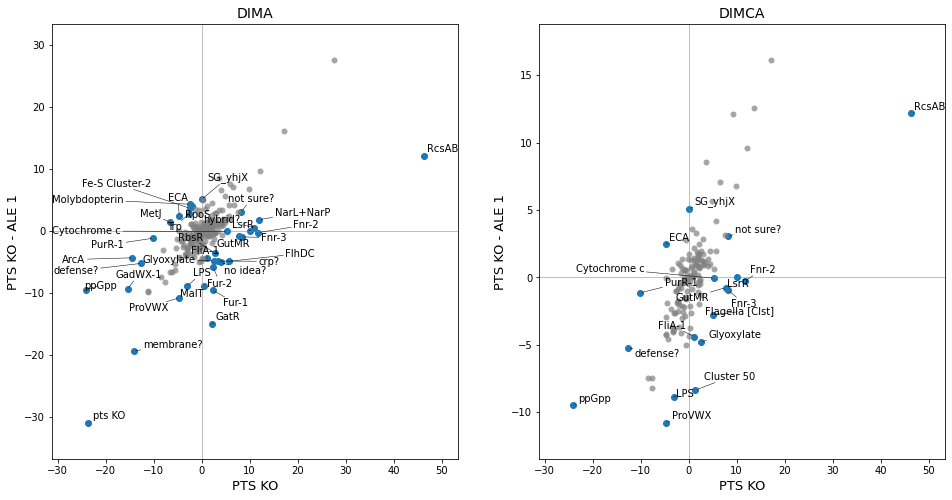

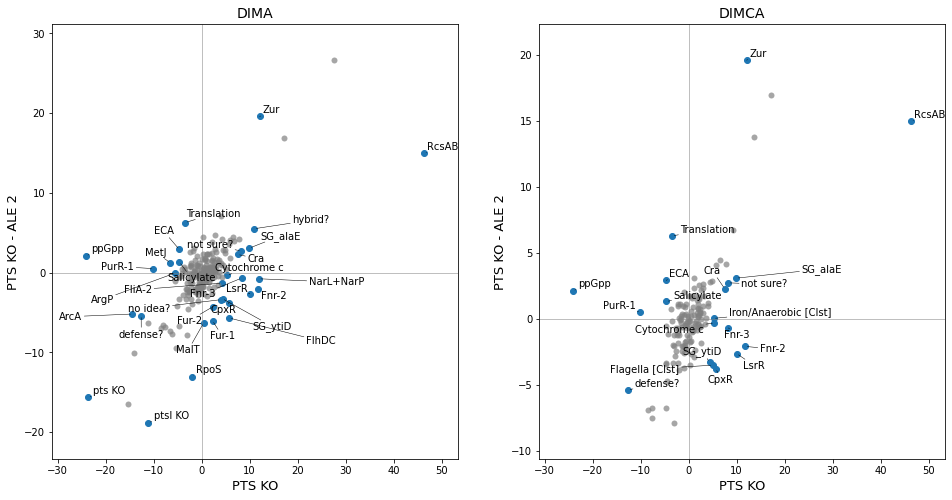

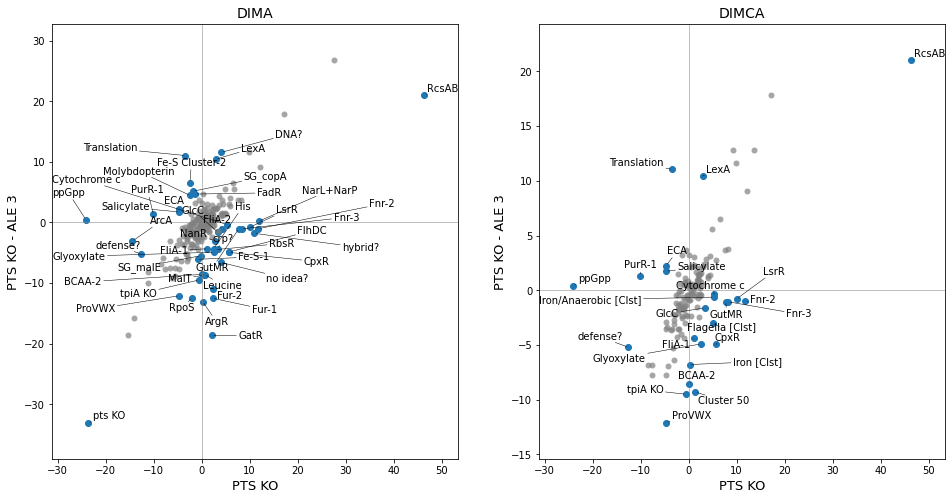

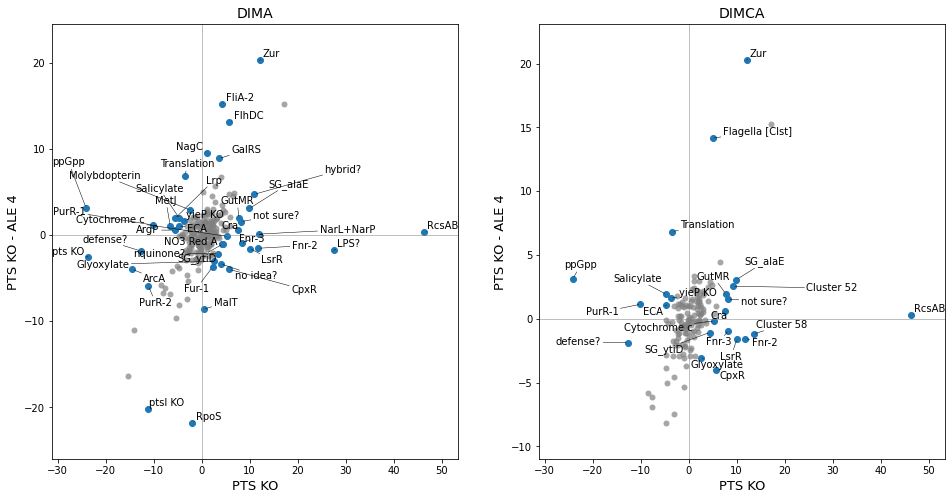

In [32]:
for i in range(1, 5):

    _, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


    plot_dima(ica_data, 'cck_pts:gmos_delptsHIcrr', f'cck_pts:pts_ale{i}', ax=ax_dima)
    ax_dima.set_xlabel('PTS KO', fontsize=13)
    ax_dima.set_ylabel(f'PTS KO - ALE {i}', fontsize=13)
    ax_dima.set_title(f'DIMA', fontsize=14)

    cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                      cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                    13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                      dimca_sample1='cck_pts:gmos_delptsHIcrr', dimca_sample2=f'cck_pts:pts_ale{i}',
                      ax=ax_dimca)

    ax_dimca.set_xlabel('PTS KO', fontsize=13)
    ax_dimca.set_ylabel(f'PTS KO - ALE {i}', fontsize=13)
    ax_dimca.set_title('DIMCA', fontsize=14)
    
    plt.show()

## GND

In [34]:
cck_table[cck_table['project'] == 'cck_gnd']

sample_id    study  project    condition  rep_id  \
ecoli_00759  cck_gnd__gmos_delgnd__1  CCK_gnd  cck_gnd  gmos_delgnd       1   
ecoli_00760  cck_gnd__gmos_delgnd__2  CCK_gnd  cck_gnd  gmos_delgnd       2   
ecoli_00761     cck_gnd__gnd_ale1__1  CCK_gnd  cck_gnd     gnd_ale1       1   
ecoli_00762     cck_gnd__gnd_ale1__2  CCK_gnd  cck_gnd     gnd_ale1       2   
ecoli_00763     cck_gnd__gnd_ale2__1  CCK_gnd  cck_gnd     gnd_ale2       1   
ecoli_00764     cck_gnd__gnd_ale2__2  CCK_gnd  cck_gnd     gnd_ale2       2   
ecoli_00765     cck_gnd__gnd_ale3__1  CCK_gnd  cck_gnd     gnd_ale3       1   
ecoli_00766     cck_gnd__gnd_ale3__2  CCK_gnd  cck_gnd     gnd_ale3       2   

                       contact            creator run_date  \
ecoli_00759  Douglas McCloskey  Douglas McCloskey  7/15/14   
ecoli_00760  Douglas McCloskey  Douglas McCloskey  7/15/14   
ecoli_00761  Douglas McCloskey  Douglas McCloskey  8/12/14   
ecoli_00762  Douglas McCloskey  Douglas McCloskey  8/12/14   
ecoli_00763  Douglas McCloskey  Douglas McCloskey  8/12/14   
ecoli_00764  Douglas McCloskey  Douglas McCloskey  8/12/14   
ecoli_00765  Douglas McCloskey  Douglas McCloskey  8/14/14   
ecoli_00766  Douglas McCloskey  Douglas McCloskey  8/13/14   

                               Strain Description Strain  ... Notes  \
ecoli_00759  Escherichia coli GLU.4.403.1 del_gnd   GMOS  ...  None   
ecoli_00760  Escherichia coli GLU.4.403.1 del_gnd   GMOS  ...  None   
ecoli_00761      Escherichia coli CCK_GND.1.170.0   GMOS  ...  None   
ecoli_00762      Escherichia coli CCK_GND.1.170.0   GMOS  ...  None   
ecoli_00763      Escherichia coli CCK_GND.2.169.0   GMOS  ...  None   
ecoli_00764      Escherichia coli CCK_GND.2.169.0   GMOS  ...  None   
ecoli_00765      Escherichia coli CCK_GND.3.171.0   GMOS  ...  None   
ecoli_00766      Escherichia coli CCK_GND.3.171.0   GMOS  ...  None   

            LibraryLayout  Platform passed_fastqc passed_pct_reads_mapped  \
ecoli_00759        SINGLE  ILLUMINA          True                    True   
ecoli_00760        SINGLE  ILLUMINA          True                    True   
ecoli_00761        SINGLE  ILLUMINA          True                    True   
ecoli_00762        SINGLE  ILLUMINA          True                    True   
ecoli_00763        SINGLE  ILLUMINA          True                    True   
ecoli_00764        SINGLE  ILLUMINA          True                    True   
ecoli_00765        SINGLE  ILLUMINA          True                    True   
ecoli_00766        SINGLE  ILLUMINA          True                    True   

            passed_reads_mapped_to_CDS  passed_global_correlation  \
ecoli_00759                       True                       True   
ecoli_00760                       True                       True   
ecoli_00761                       True                       True   
ecoli_00762                       True                       True   
ecoli_00763                       True                       True   
ecoli_00764                       True                       True   
ecoli_00765                       True                       True   
ecoli_00766                       True                       True   

                       full_name passed_similar_replicates  \
ecoli_00759  cck_gnd:gmos_delgnd                      True   
ecoli_00760  cck_gnd:gmos_delgnd                      True   
ecoli_00761     cck_gnd:gnd_ale1                      True   
ecoli_00762     cck_gnd:gnd_ale1                      True   
ecoli_00763     cck_gnd:gnd_ale2                      True   
ecoli_00764     cck_gnd:gnd_ale2                      True   
ecoli_00765     cck_gnd:gnd_ale3                      True   
ecoli_00766     cck_gnd:gnd_ale3                      True   

            passed_number_replicates  
ecoli_00759                     True  
ecoli_00760                     True  
ecoli_00761                     True  
ecoli_00762                     True  
ecoli_00763                     True  
ecoli_0

### Comparing Glu-Evolved to PTS KO

Text(0.5, 1.0, 'gnd KO - DIMCA')

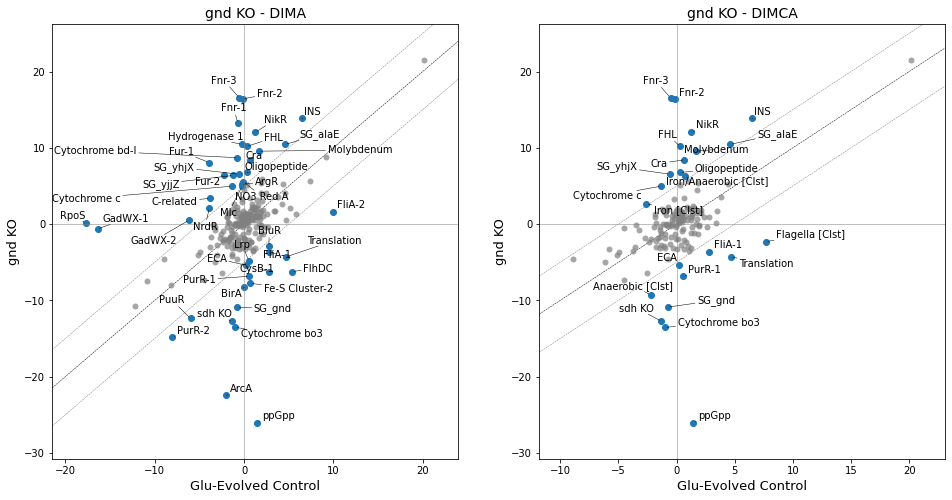

In [14]:
_, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


plot_dima(ica_data, cck_wt_evolved, 'cck_gnd:gmos_delgnd', ax=ax_dima)
ax_dima.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dima.set_ylabel('gnd KO', fontsize=13)
ax_dima.set_title('gnd KO - DIMA', fontsize=14)

cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                  cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                  dimca_sample1=cck_wt_evolved, dimca_sample2='cck_gnd:gmos_delgnd',
                  ax=ax_dimca)

ax_dimca.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dimca.set_ylabel('gnd KO', fontsize=13)
ax_dimca.set_title('gnd KO - DIMCA', fontsize=14)

### Evolved gnd Deletions

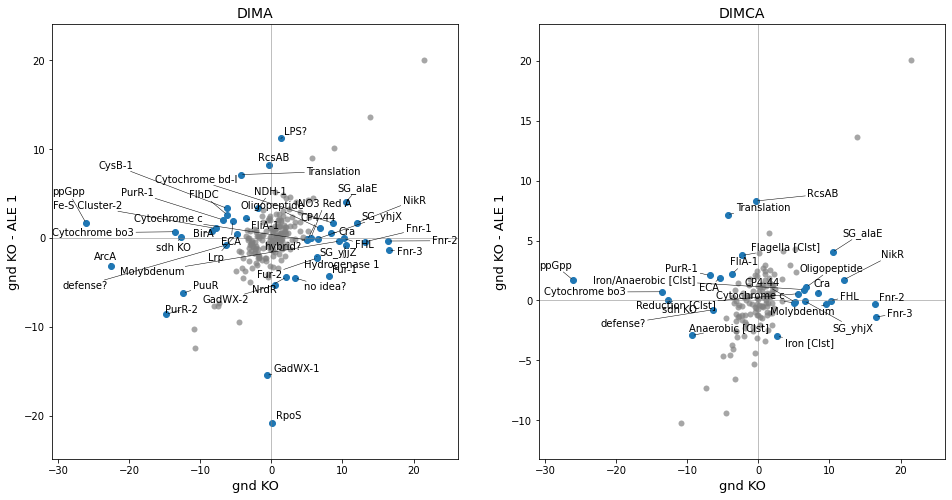

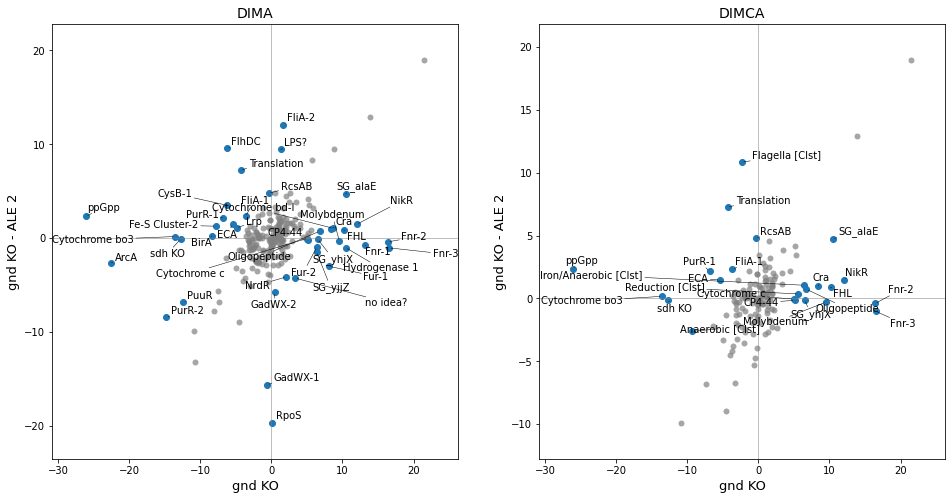

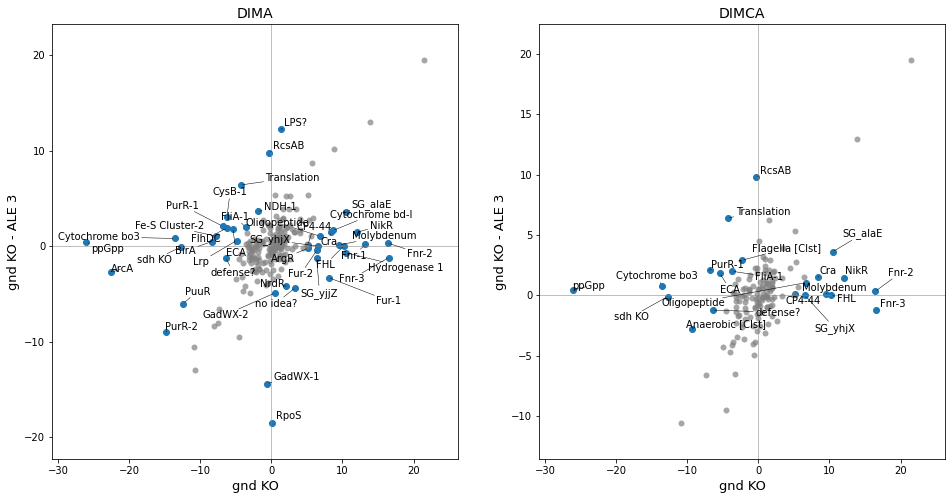

In [35]:
for i in range(1, 4):

    _, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


    plot_dima(ica_data, 'cck_gnd:gmos_delgnd', f'cck_gnd:gnd_ale{i}', ax=ax_dima)
    ax_dima.set_xlabel('gnd KO', fontsize=13)
    ax_dima.set_ylabel(f'gnd KO - ALE {i}', fontsize=13)
    ax_dima.set_title(f'DIMA', fontsize=14)

    cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                      cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                    13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                      dimca_sample1='cck_gnd:gmos_delgnd', dimca_sample2=f'cck_gnd:gnd_ale{i}',
                      ax=ax_dimca)

    ax_dimca.set_xlabel('gnd KO', fontsize=13)
    ax_dimca.set_ylabel(f'gnd KO - ALE {i}', fontsize=13)
    ax_dimca.set_title('DIMCA', fontsize=14)
    
    plt.show()

## tpiA

In [36]:
cck_table[cck_table['project'] == 'cck_tpiA']

sample_id     study   project     condition  \
ecoli_00767  cck_tpiA__gmos_deltpiA__1  CCK_tpiA  cck_tpiA  gmos_deltpiA   
ecoli_00768  cck_tpiA__gmos_deltpiA__2  CCK_tpiA  cck_tpiA  gmos_deltpiA   
ecoli_00769     cck_tpiA__tpiA_ale1__1  CCK_tpiA  cck_tpiA     tpiA_ale1   
ecoli_00770     cck_tpiA__tpiA_ale1__2  CCK_tpiA  cck_tpiA     tpiA_ale1   
ecoli_00771     cck_tpiA__tpiA_ale2__1  CCK_tpiA  cck_tpiA     tpiA_ale2   
ecoli_00772     cck_tpiA__tpiA_ale2__2  CCK_tpiA  cck_tpiA     tpiA_ale2   
ecoli_00773     cck_tpiA__tpiA_ale3__1  CCK_tpiA  cck_tpiA     tpiA_ale3   
ecoli_00774     cck_tpiA__tpiA_ale3__2  CCK_tpiA  cck_tpiA     tpiA_ale3   
ecoli_00775     cck_tpiA__tpiA_ale4__1  CCK_tpiA  cck_tpiA     tpiA_ale4   
ecoli_00776     cck_tpiA__tpiA_ale4__2  CCK_tpiA  cck_tpiA     tpiA_ale4   

             rep_id            contact            creator run_date  \
ecoli_00767       1  Douglas McCloskey  Douglas McCloskey  7/21/14   
ecoli_00768       2  Douglas McCloskey  Douglas McCloskey  7/21/14   
ecoli_00769       1  Douglas McCloskey  Douglas McCloskey   8/7/14   
ecoli_00770       2  Douglas McCloskey  Douglas McCloskey   8/7/14   
ecoli_00771       1  Douglas McCloskey  Douglas McCloskey   8/7/14   
ecoli_00772       2  Douglas McCloskey  Douglas McCloskey   8/7/14   
ecoli_00773       1  Douglas McCloskey  Douglas McCloskey  8/11/14   
ecoli_00774       2  Douglas McCloskey  Douglas McCloskey  8/11/14   
ecoli_00775       1  Douglas McCloskey  Douglas McCloskey  8/11/14   
ecoli_00776       2  Douglas McCloskey  Douglas McCloskey  8/11/14   

                                Strain Description Strain  ... Notes  \
ecoli_00767  Escherichia coli GLU.4.403.1 del_tpiA   GMOS  ...  None   
ecoli_00768  Escherichia coli GLU.4.403.1 del_tpiA   GMOS  ...  None   
ecoli_00769       Escherichia coli CCK_TPIA.1.89.0   GMOS  ...  None   
ecoli_00770       Escherichia coli CCK_TPIA.1.89.0   GMOS  ...  None   
ecoli_00771       Escherichia coli CCK_TPIA.2.89.0   GMOS  ...  None   
ecoli_00772       Escherichia coli CCK_TPIA.2.89.0   GMOS  ...  None   
ecoli_00773       Escherichia coli CCK_TPIA.3.88.0   GMOS  ...  None   
ecoli_00774       Escherichia coli CCK_TPIA.3.88.0   GMOS  ...  None   
ecoli_00775       Escherichia coli CCK_TPIA.4.88.0   GMOS  ...  None   
ecoli_00776       Escherichia coli CCK_TPIA.4.88.0   GMOS  ...  None   

            LibraryLayout  Platform passed_fastqc passed_pct_reads_mapped  \
ecoli_00767        SINGLE  ILLUMINA          True                    True   
ecoli_00768        SINGLE  ILLUMINA          True                    True   
ecoli_00769        SINGLE  ILLUMINA          True                    True   
ecoli_00770        SINGLE  ILLUMINA          True                    True   
ecoli_00771        SINGLE  ILLUMINA          True                    True   
ecoli_00772        SINGLE  ILLUMINA          True                    True   
ecoli_00773        SINGLE  ILLUMINA          True                    True   
ecoli_00774        SINGLE  ILLUMINA          True                    True   
ecoli_00775        SINGLE  ILLUMINA          True                    True   
ecoli_00776        SINGLE  ILLUMINA          True                    True   

            passed_reads_mapped_to_CDS  passed_global_correlation  \
ecoli_00767                       True                       True   
ecoli_00768                       True                       True   
ecoli_00769                       True                       True   
ecoli_00770                       True                       True   
ecoli_00771                       True                       True   
ecoli_00772                       True                       True   
ecoli_00773                       True                       True   
ecoli_00774                       True                       True   
ecoli_00775                       True                       True   
ecoli_00776                       True                       True   

                    

### Comparing Glu-Evolved to PTS KO

Text(0.5, 1.0, 'tpiA KO - DIMCA')

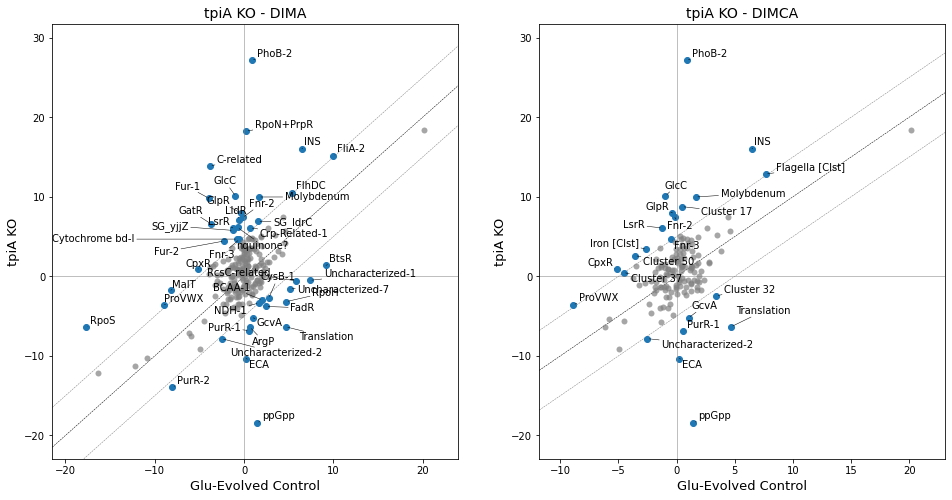

In [15]:
_, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


plot_dima(ica_data, cck_wt_evolved, 'cck_tpiA:gmos_deltpiA', ax=ax_dima)
ax_dima.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dima.set_ylabel('tpiA KO', fontsize=13)
ax_dima.set_title('tpiA KO - DIMA', fontsize=14)

cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                  cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                  dimca_sample1=cck_wt_evolved, dimca_sample2='cck_tpiA:gmos_deltpiA',
                  ax=ax_dimca)

ax_dimca.set_xlabel('Glu-Evolved Control', fontsize=13)
ax_dimca.set_ylabel('tpiA KO', fontsize=13)
ax_dimca.set_title('tpiA KO - DIMCA', fontsize=14)

### Evolved tpiA Deletions

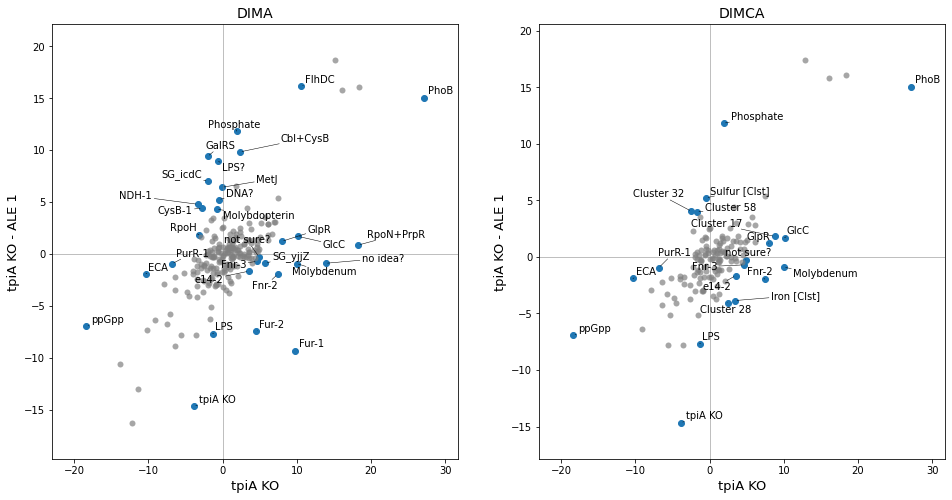

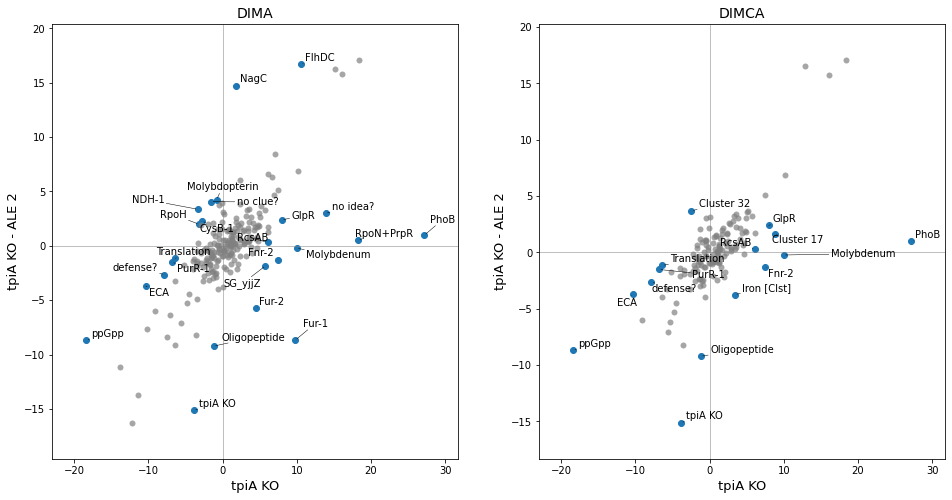

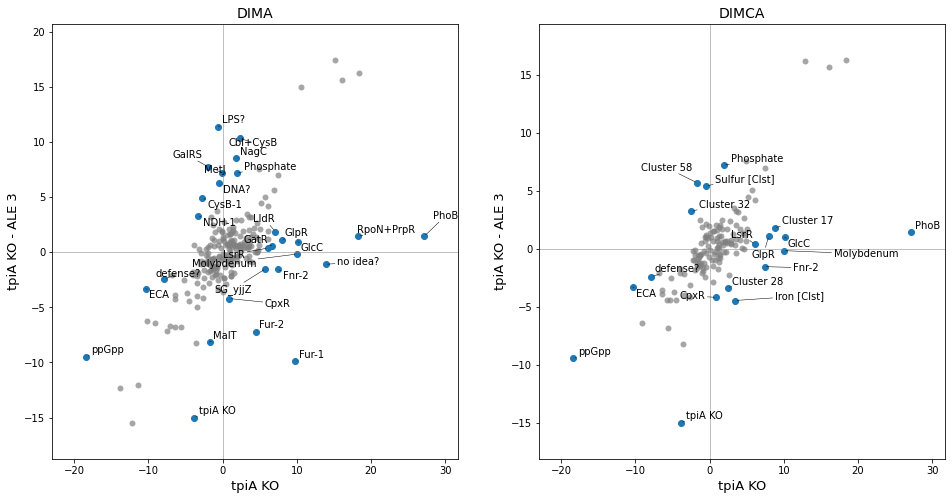

In [38]:
for i in range(1, 4):

    _, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


    plot_dima(ica_data, 'cck_tpiA:gmos_deltpiA', f'cck_tpiA:tpiA_ale{i}', ax=ax_dima)
    ax_dima.set_xlabel('tpiA KO', fontsize=13)
    ax_dima.set_ylabel(f'tpiA KO - ALE {i}', fontsize=13)
    ax_dima.set_title(f'DIMA', fontsize=14)

    cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                      cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                    13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                      dimca_sample1='cck_tpiA:gmos_deltpiA', dimca_sample2=f'cck_tpiA:tpiA_ale{i}',
                      ax=ax_dimca)

    ax_dimca.set_xlabel('tpiA KO', fontsize=13)
    ax_dimca.set_ylabel(f'tpiA KO - ALE {i}', fontsize=13)
    ax_dimca.set_title('DIMCA', fontsize=14)
    
    plt.show()

## pColi

In [40]:
pcoli_table = ica_data.sample_table[ica_data.sample_table['project'] == 'pcoli']
pcoli_table

sample_id  study project    condition  rep_id  \
ecoli_00622  pcoli__atASMT_325G__1  pColi   pcoli  atASMT_325G       1   
ecoli_00623  pcoli__atASMT_325G__2  pColi   pcoli  atASMT_325G       2   
ecoli_00624        pcoli__bpTDC__1  pColi   pcoli        bpTDC       1   
ecoli_00625        pcoli__bpTDC__2  pColi   pcoli        bpTDC       2   
ecoli_00626         pcoli__BRCA__1  pColi   pcoli         BRCA       1   
...                            ...    ...     ...          ...     ...   
ecoli_00711        pcoli__ssDDC__2  pColi   pcoli        ssDDC       2   
ecoli_00712        pcoli__TP53B__1  pColi   pcoli        TP53B       1   
ecoli_00713        pcoli__TP53B__2  pColi   pcoli        TP53B       2   
ecoli_00714           pcoli__WT__1  pColi   pcoli           WT       1   
ecoli_00715           pcoli__WT__2  pColi   pcoli           WT       2   

                contact     creator run_date  \
ecoli_00622  Justin Tan  Justin Tan     None   
ecoli_00623  Justin Tan  Justin Tan     None   
ecoli_00624  Justin Tan  Justin Tan   3/8/18   
ecoli_00625  Justin Tan  Justin Tan   3/8/18   
ecoli_00626  Justin Tan  Justin Tan     None   
...                 ...         ...      ...   
ecoli_00711  Justin Tan  Justin Tan   3/8/18   
ecoli_00712  Justin Tan  Justin Tan     None   
ecoli_00713  Justin Tan  Justin Tan     None   
ecoli_00714  Justin Tan  Justin Tan   3/8/18   
ecoli_00715  Justin Tan  Justin Tan   3/8/18   

                                   Strain Description  Strain  ... Notes  \
ecoli_00622  Escherichia Coli K-12 MG1655 atASMT_325G  MG1655  ...  None   
ecoli_00623  Escherichia Coli K-12 MG1655 atASMT_325G  MG1655  ...  None   
ecoli_00624        Escherichia Coli K-12 MG1655 bpTDC  MG1655  ...  None   
ecoli_00625        Escherichia Coli K-12 MG1655 bpTDC  MG1655  ...  None   
ecoli_00626         Escherichia Coli K-12 MG1655 BRCA  MG1655  ...  None   
...                                               ...     ...  ...   ...   
ecoli_00711        Escherichia Coli K-12 MG1655 ssDDC  MG1655  ...  None   
ecoli_00712        Escherichia Coli K-12 MG1655 TP53B  MG1655  ...  None   
ecoli_00713        Escherichia Coli K-12 MG1655 TP53B  MG1655  ...  None   
ecoli_00714              Escherichia Coli K-12 MG1655  MG1655  ...  None   
ecoli_00715              Escherichia Coli K-12 MG1655  MG1655  ...  None   

            LibraryLayout  Platform passed_fastqc passed_pct_reads_mapped  \
ecoli_00622        PAIRED  ILLUMINA          True                    True   
ecoli_00623        PAIRED  ILLUMINA          True                    True   
ecoli_00624        PAIRED  ILLUMINA          True                    True   
ecoli_00625        PAIRED  ILLUMINA          True                    True   
ecoli_00626        PAIRED  ILLUMINA          True                    True   
...                   ...       ...           ...                     ...   
ecoli_00711        PAIRED  ILLUMINA          True                    True   
ecoli_00712        PAIRED  ILLUMINA          True                    True   
ecoli_00713        PAIRED  ILLUMINA          True                    True   
ecoli_00714        PAIRED  ILLUMINA          True                    True   
ecoli_00715        PAIRED  ILLUMINA          True                    True   

            passed_reads_mapped_to_CDS  passed_global_correlation  \
ecoli_00622                       True                       True   
ecoli_00623                       True                       True   
ecoli_00624                       True                       True   
ecoli_00625                       True                       True   
ecoli_00626                       True                       True   
...                                ...                        ...   
ecoli_00711                       True                       True   
ecoli_00712                       True                       True   
ecoli_00713                       True                       True   
ecoli_00714                    

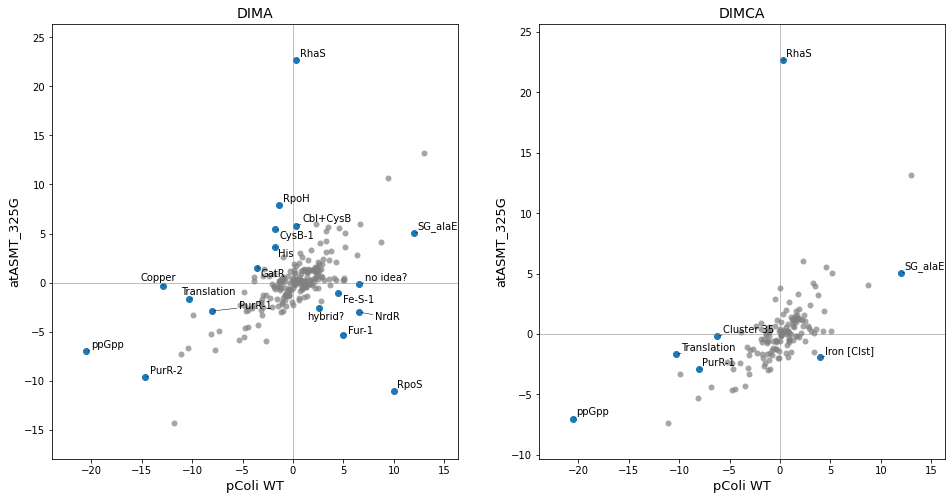

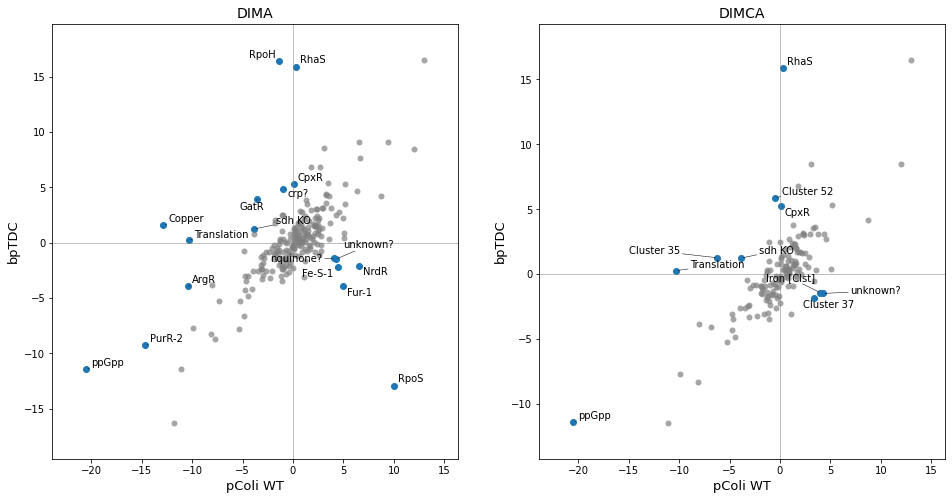

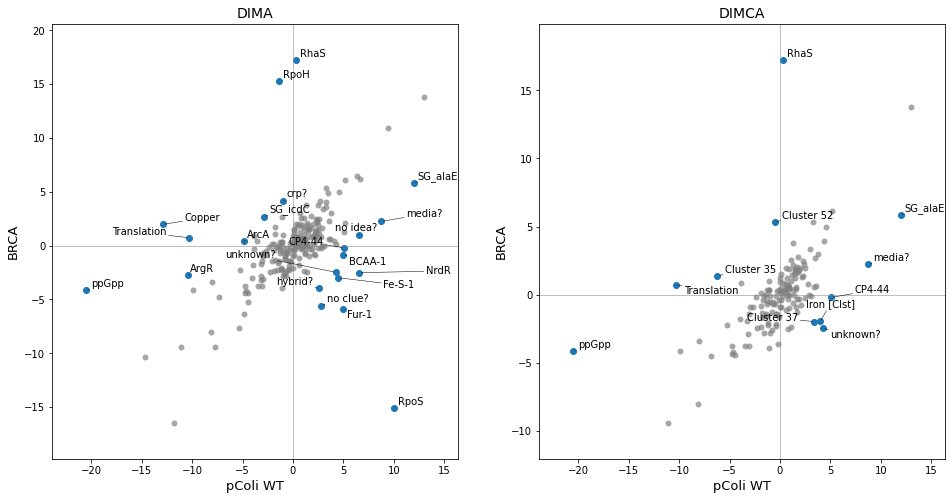

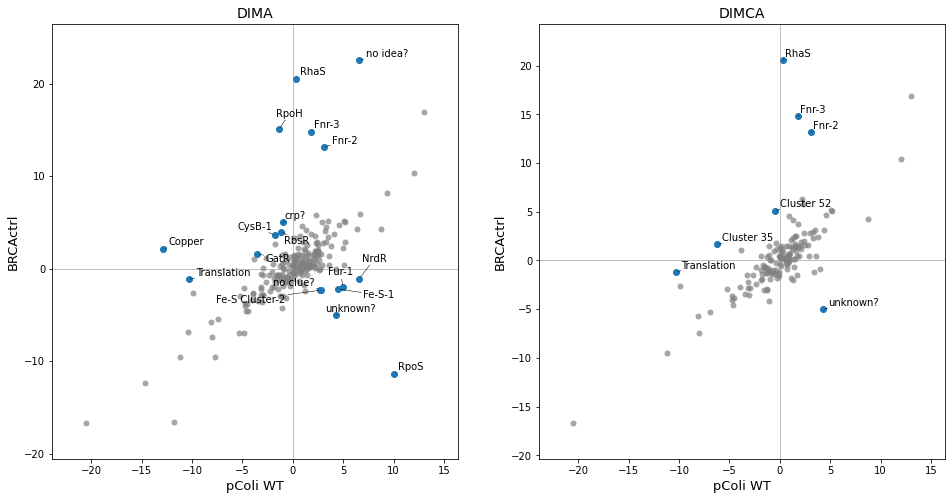

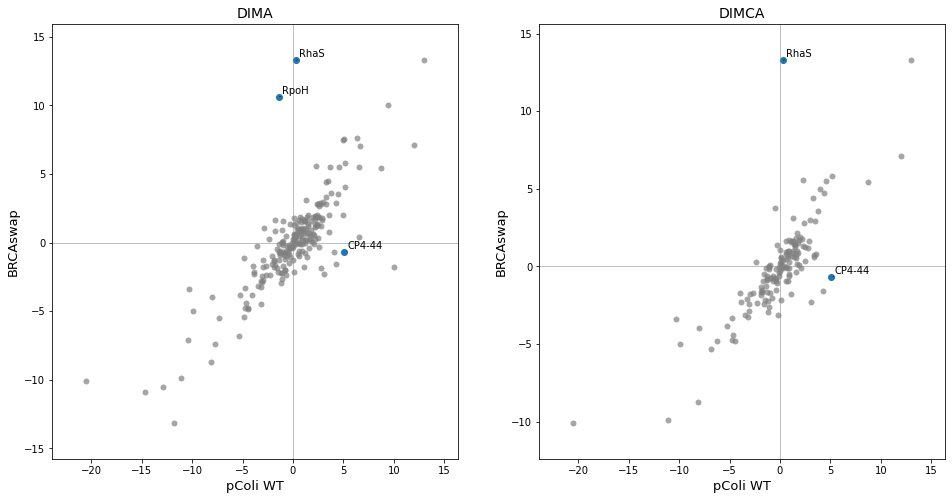

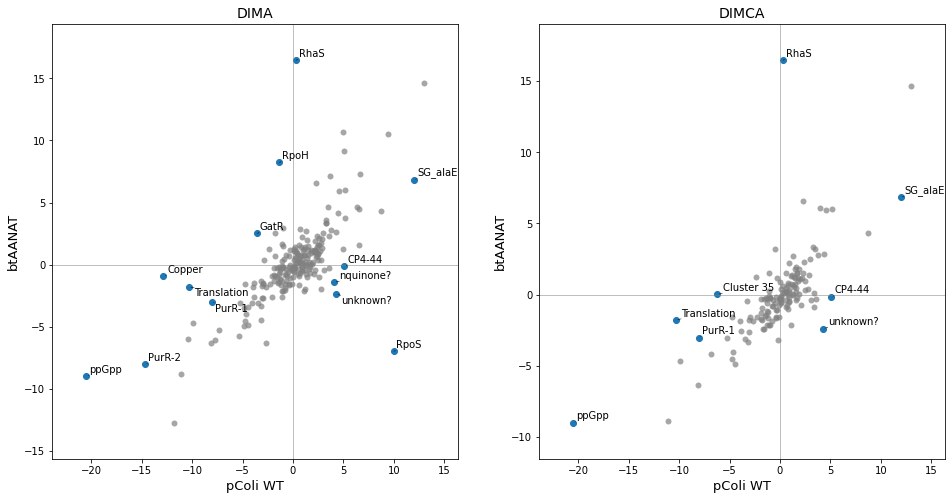

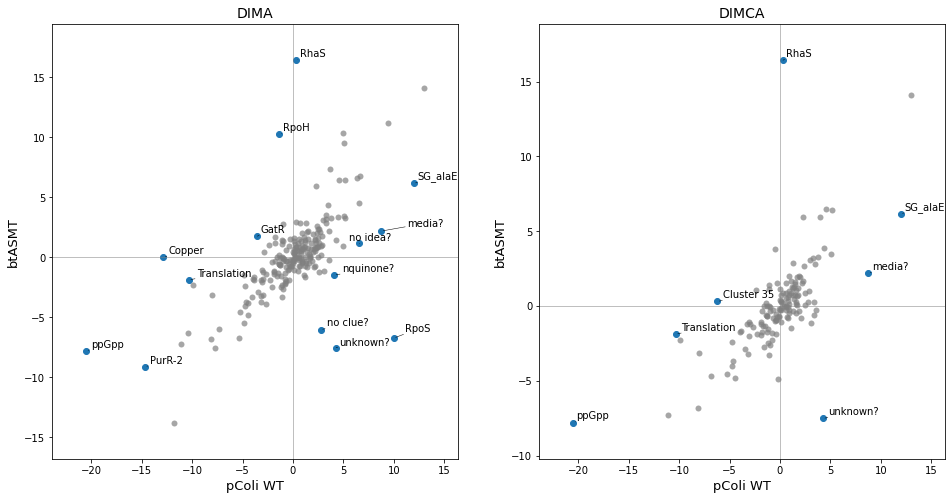

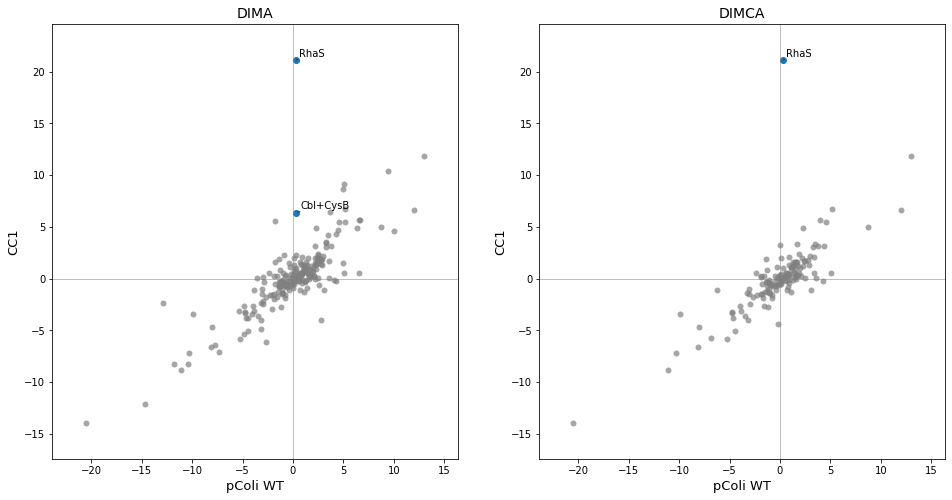

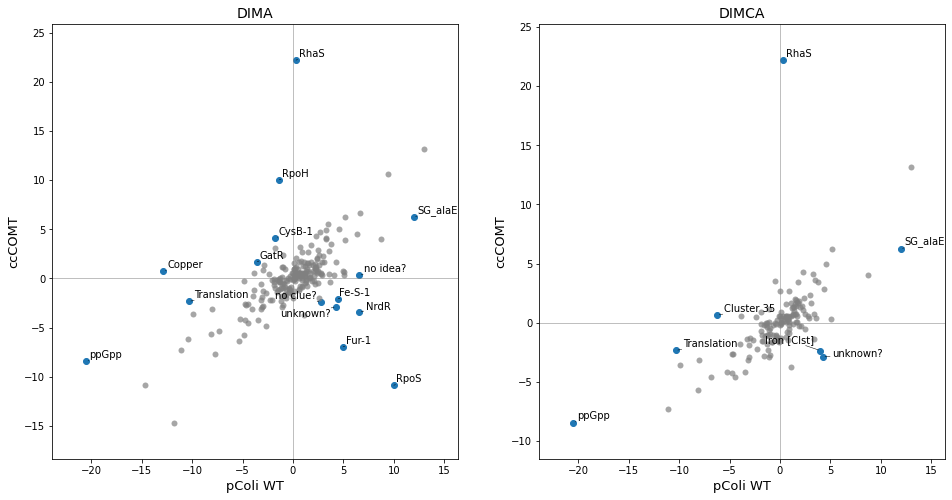

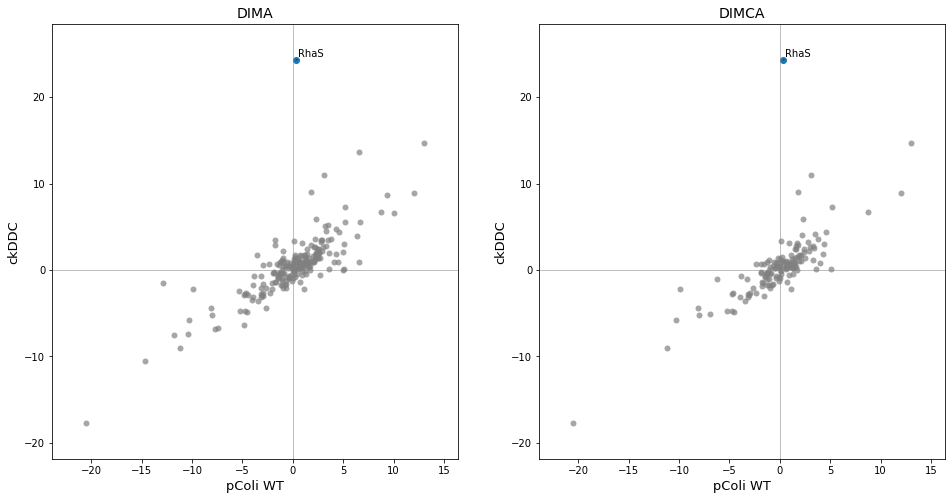

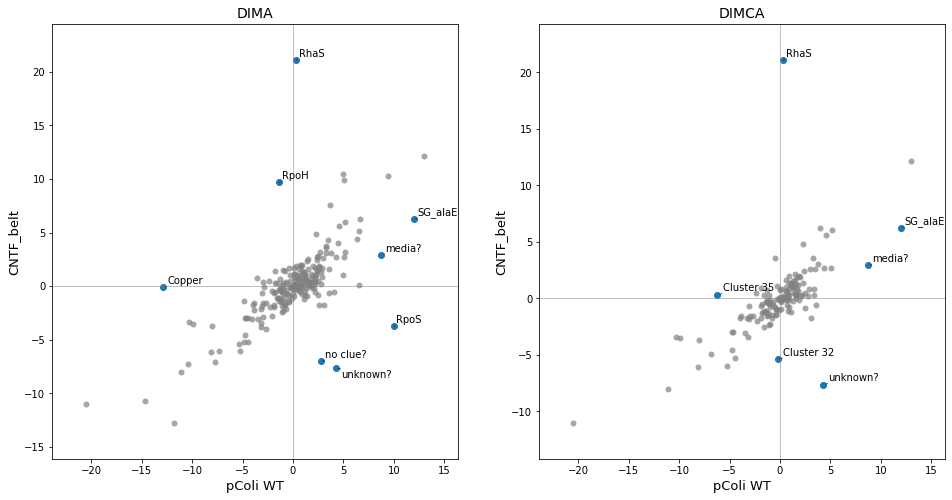

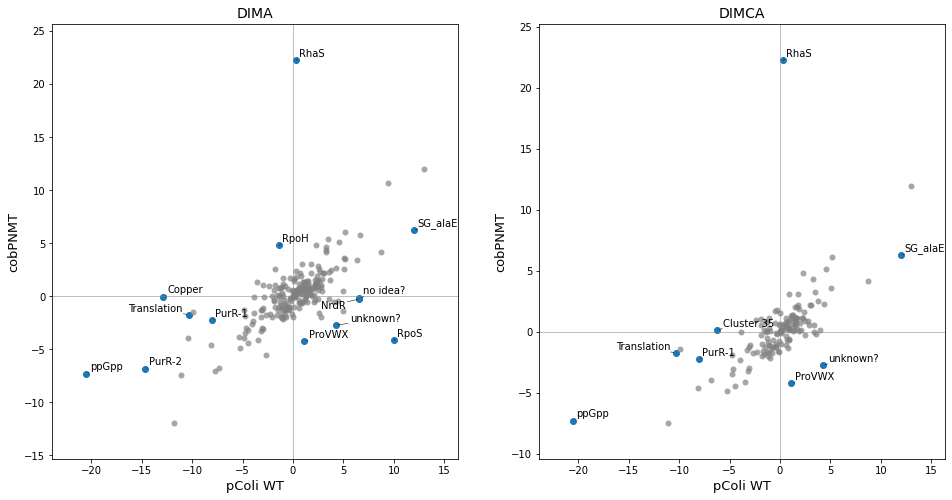

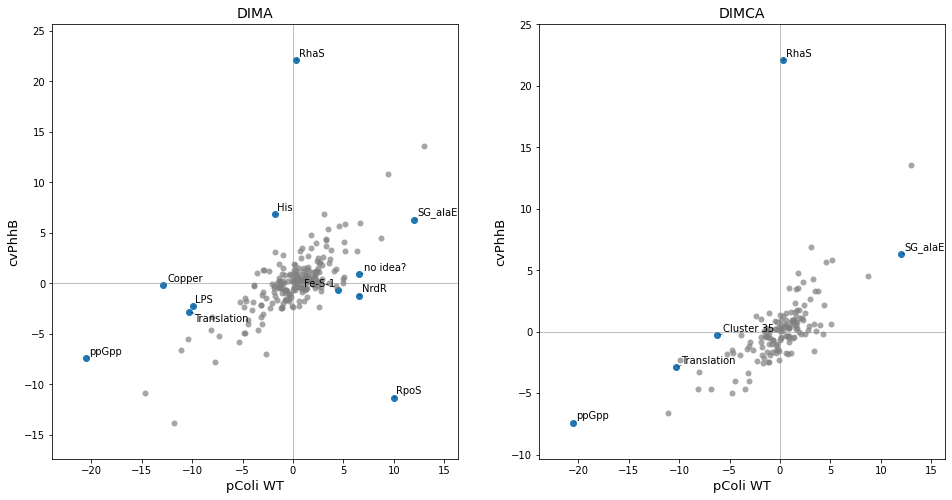

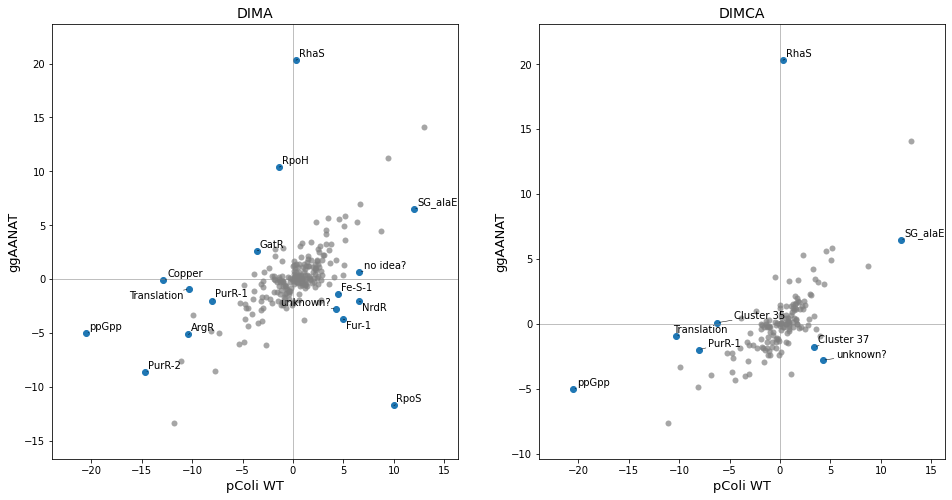

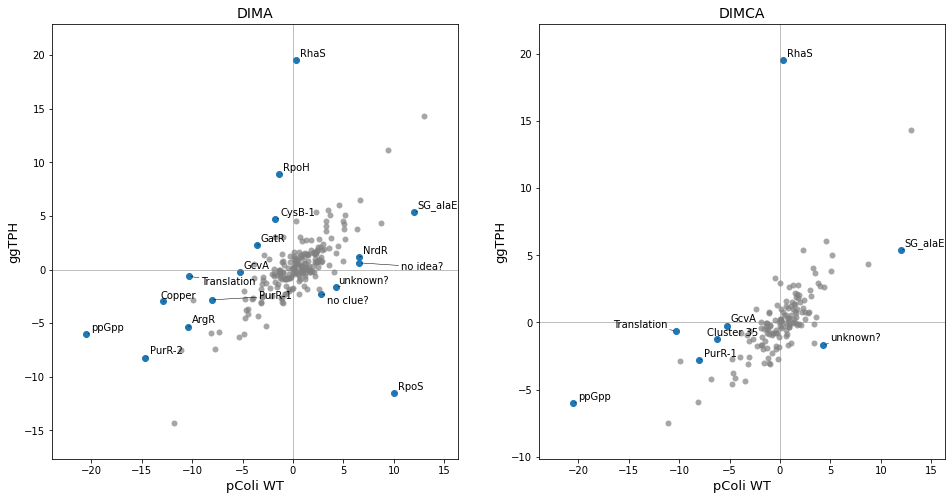

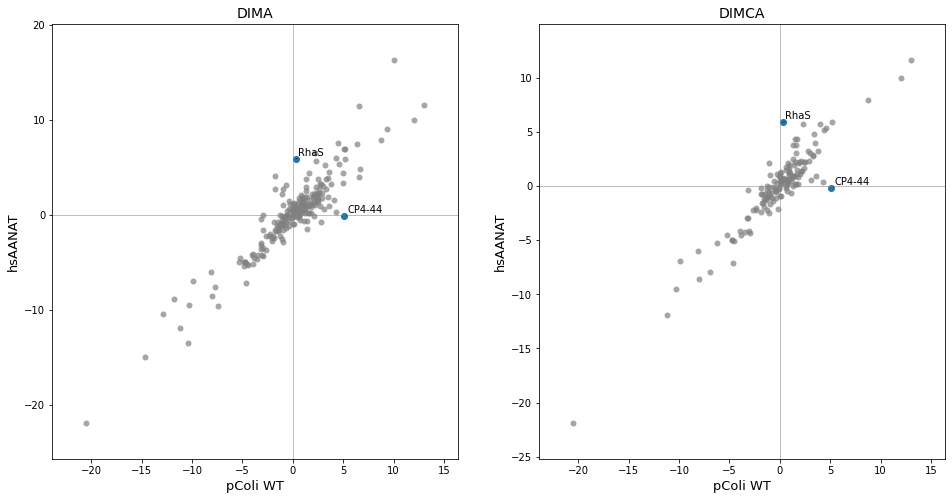

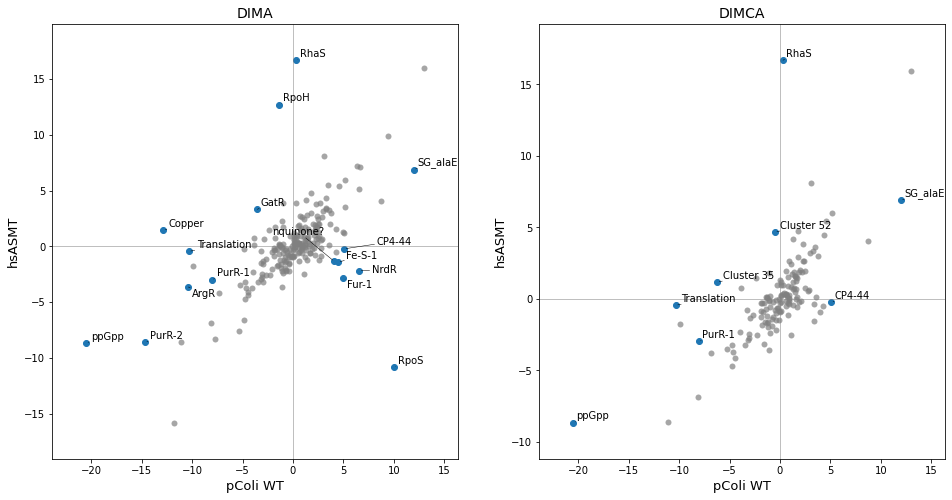

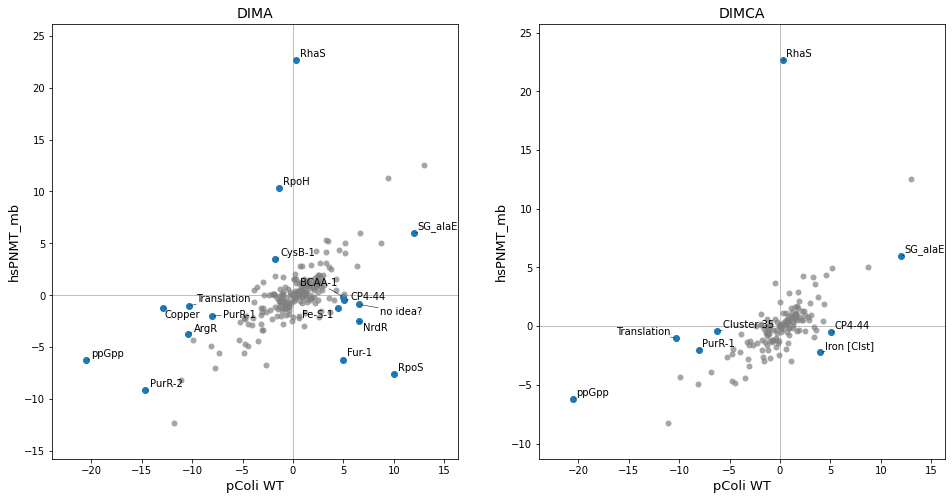

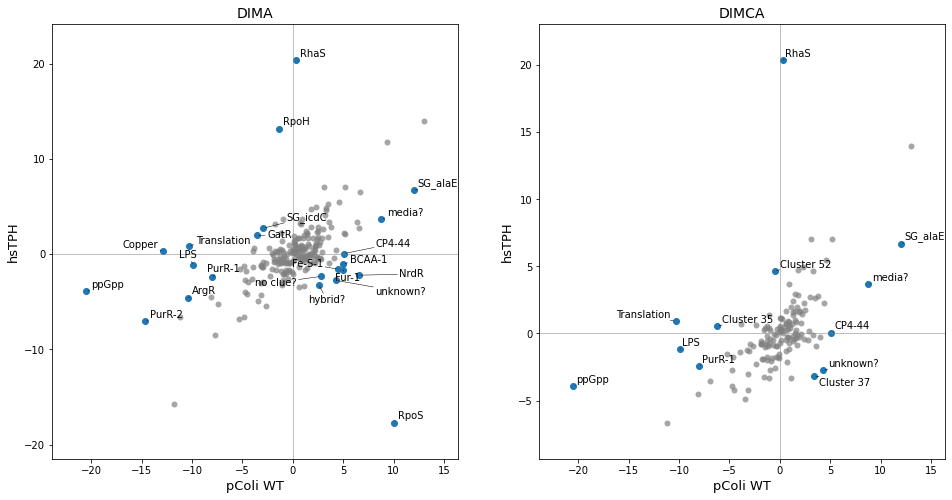

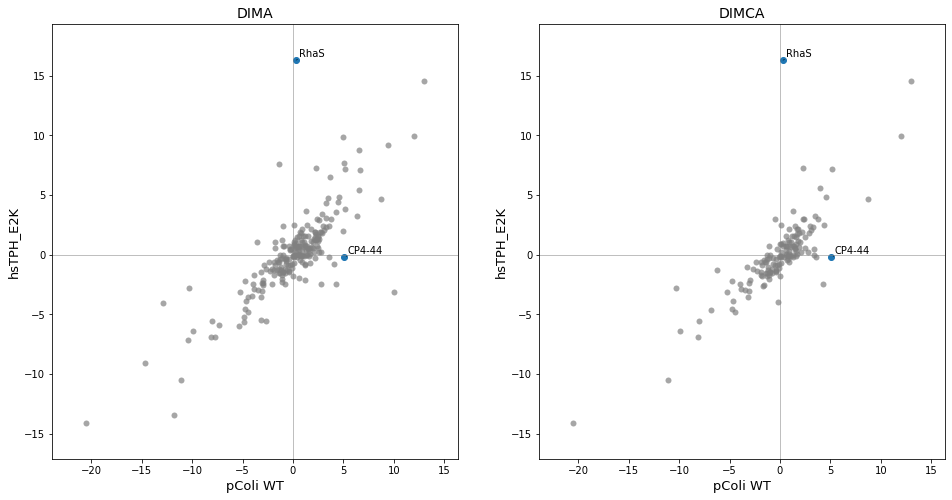

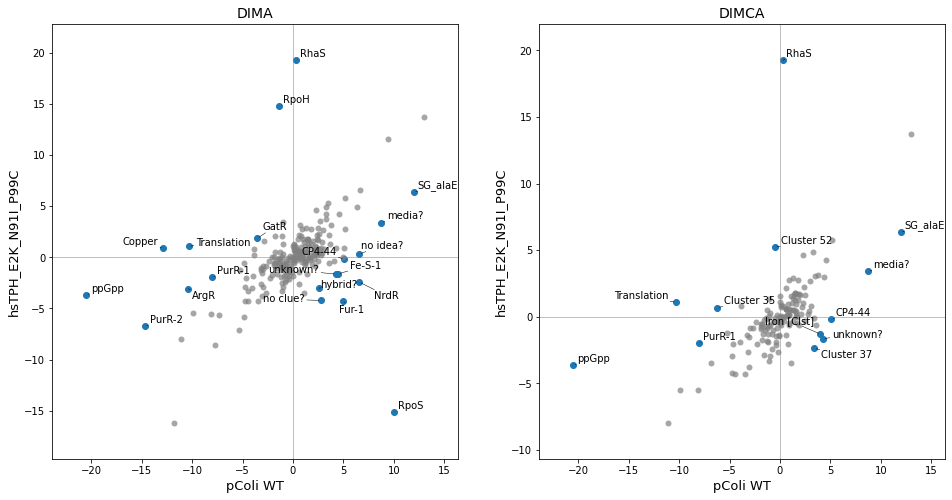

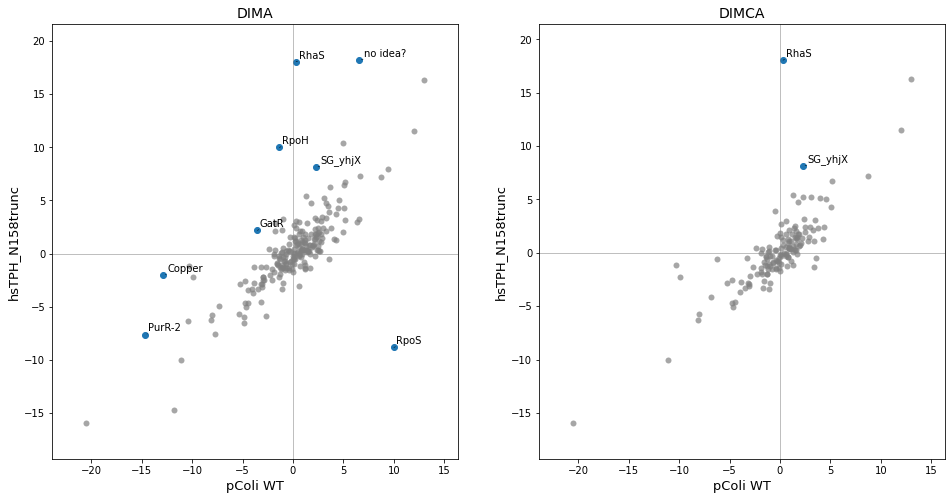

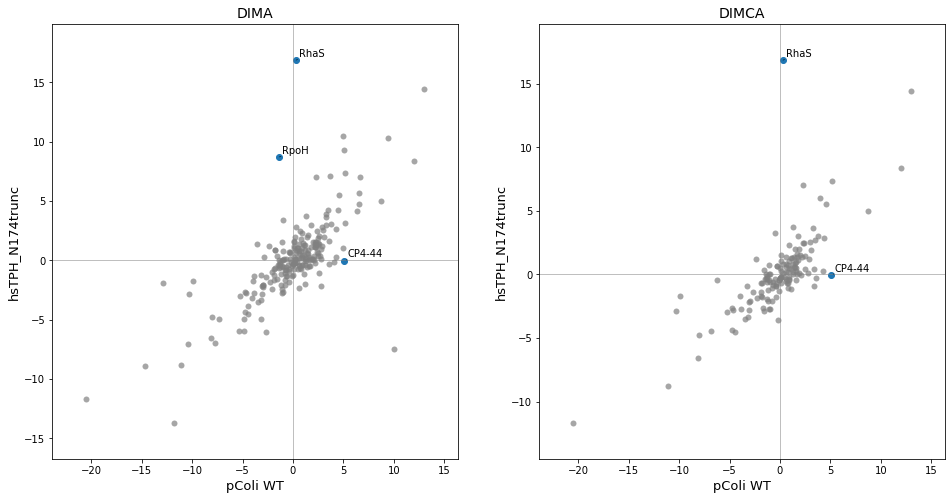

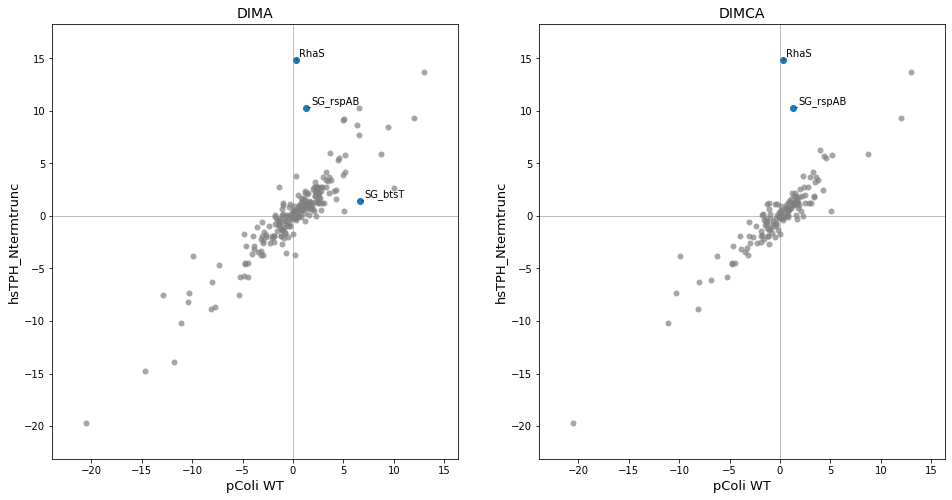

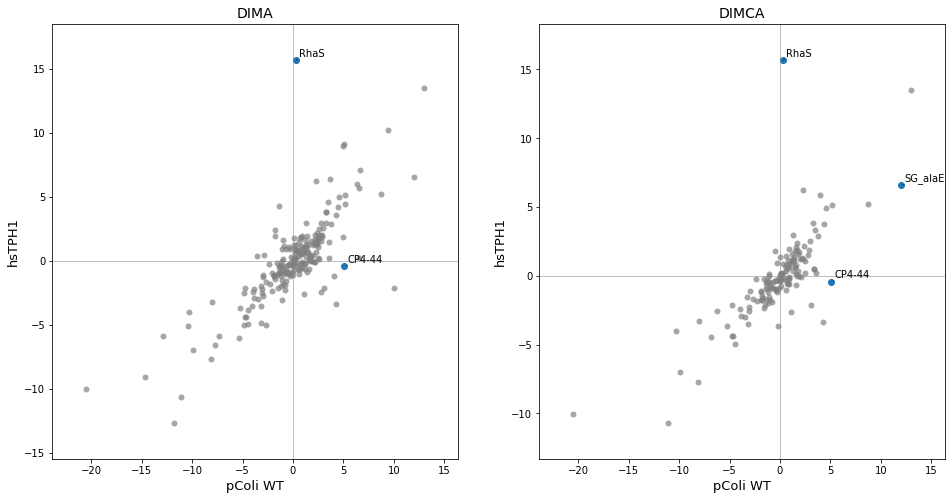

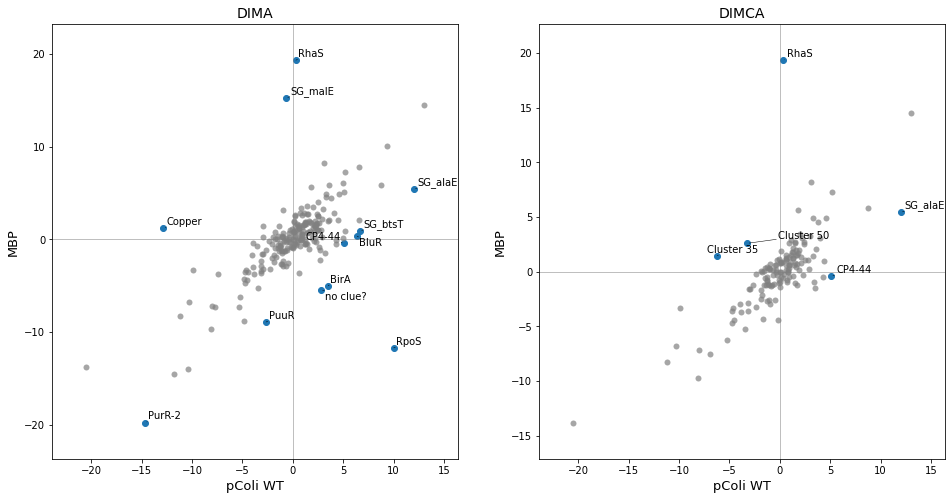

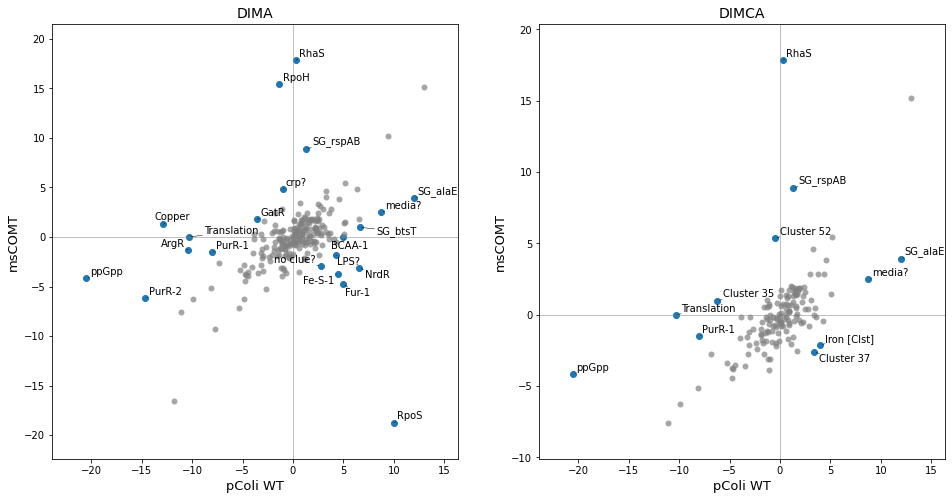

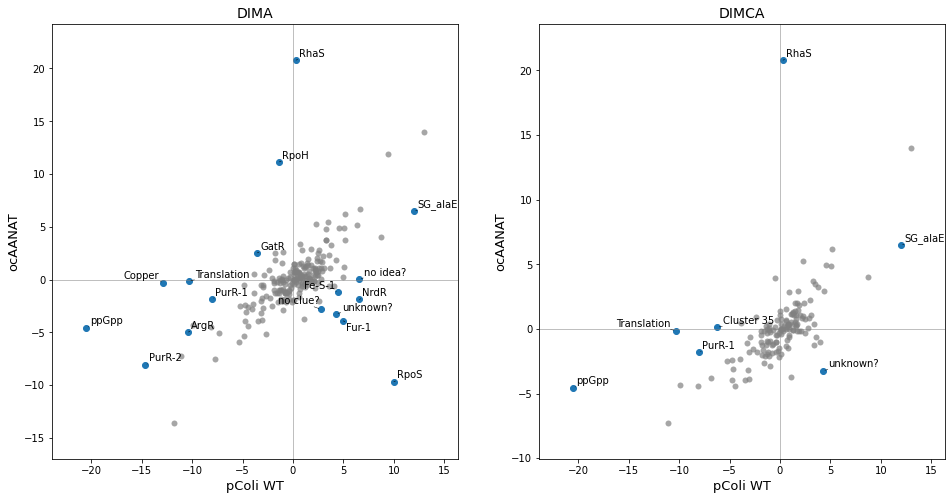

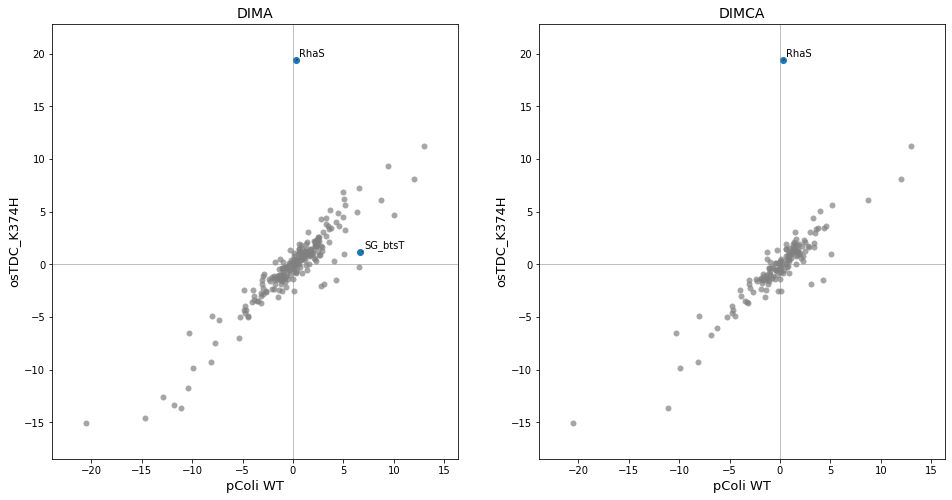

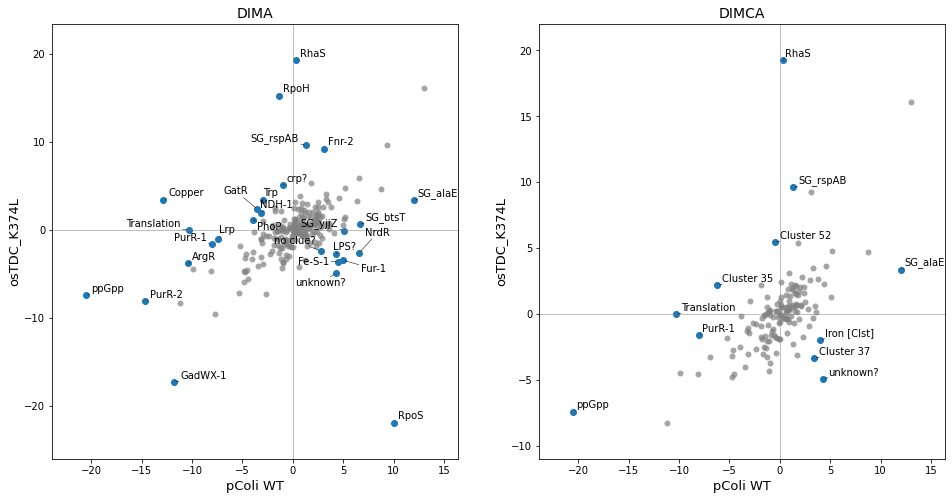

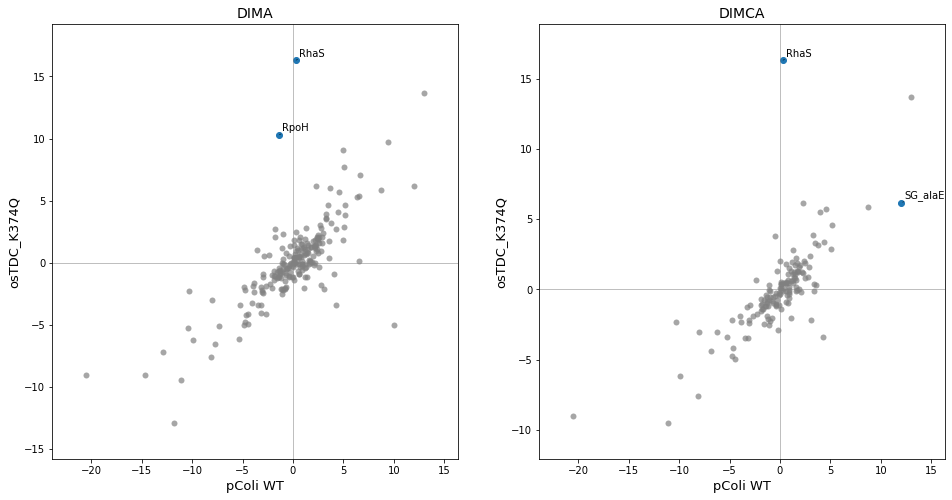

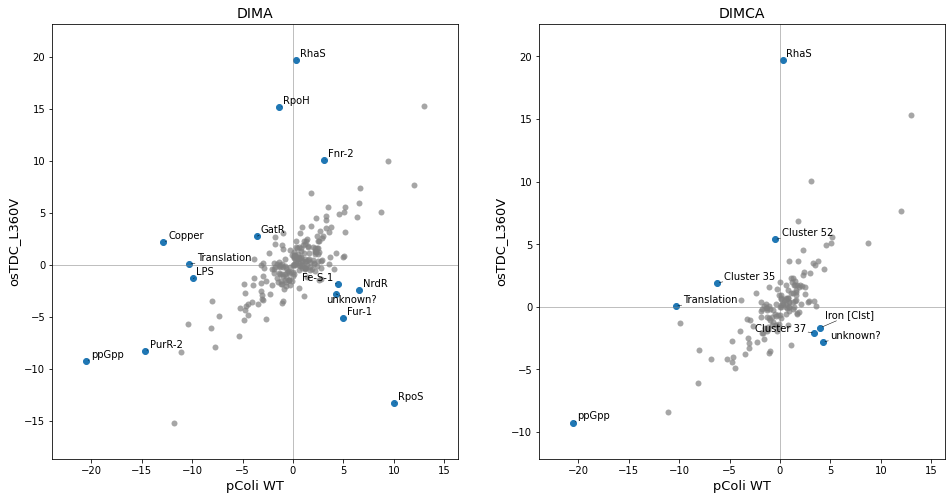

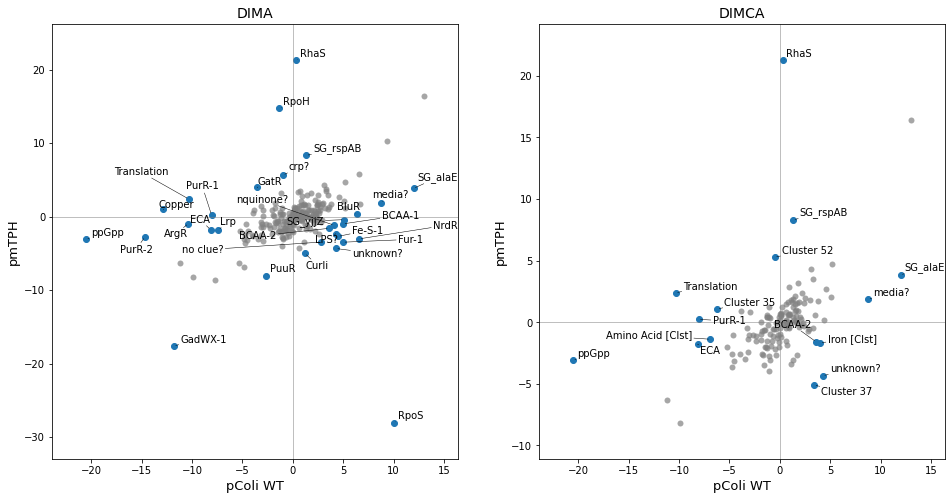

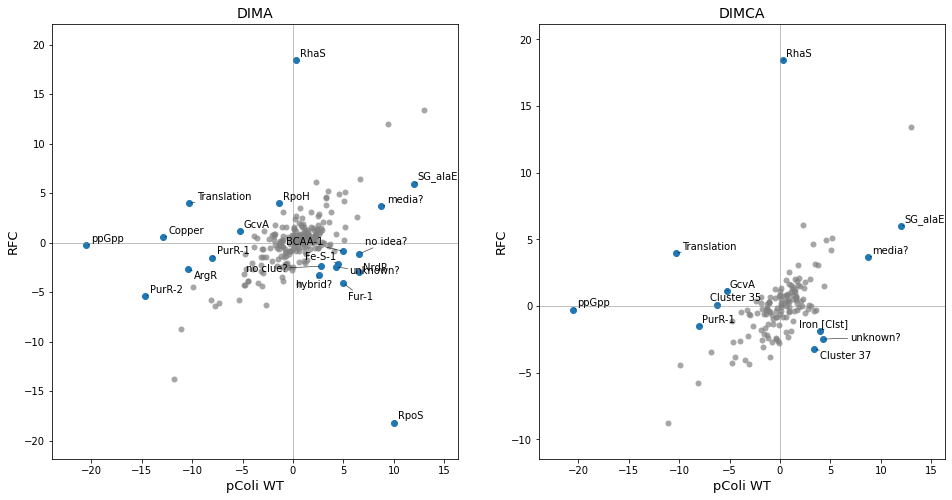

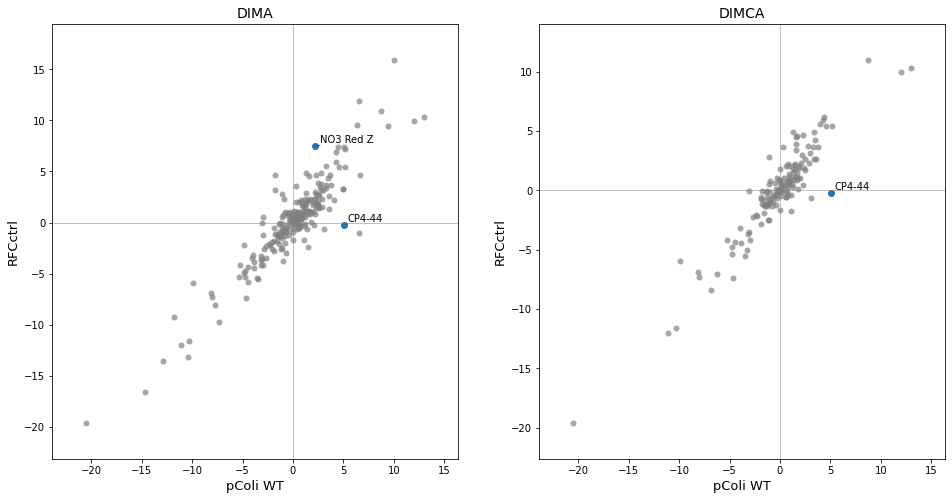

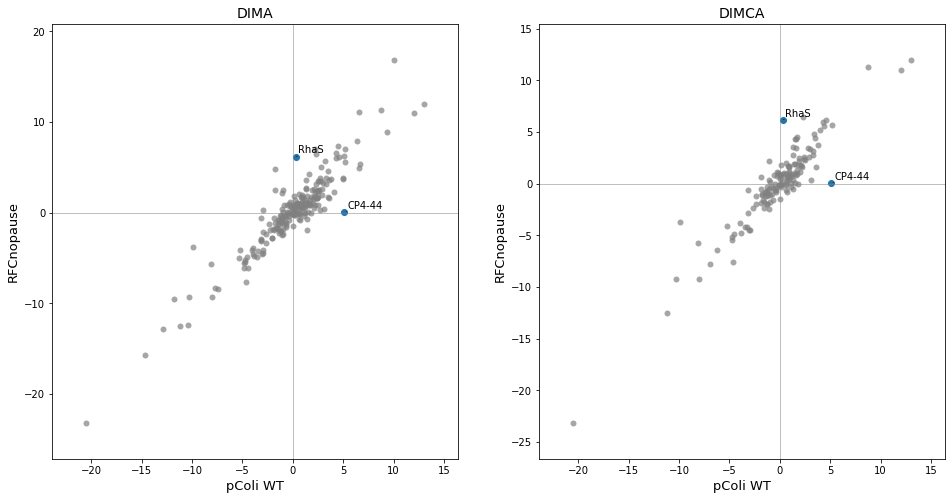

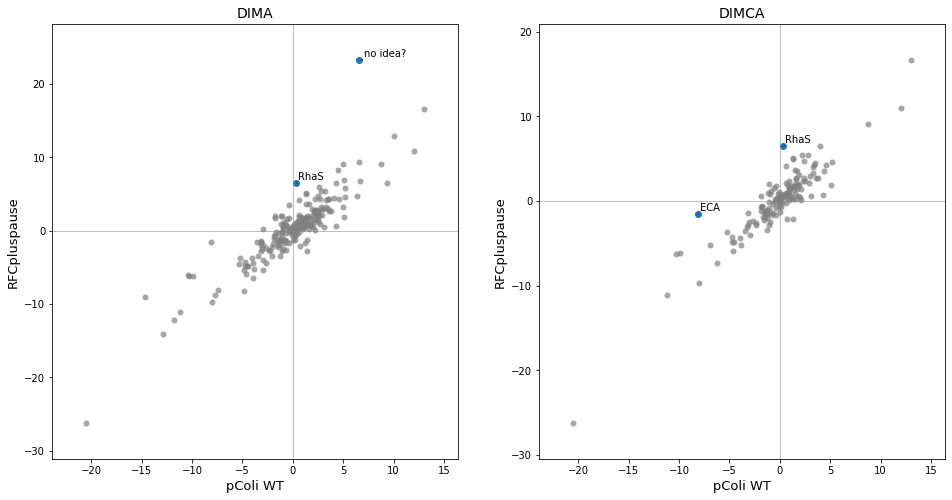

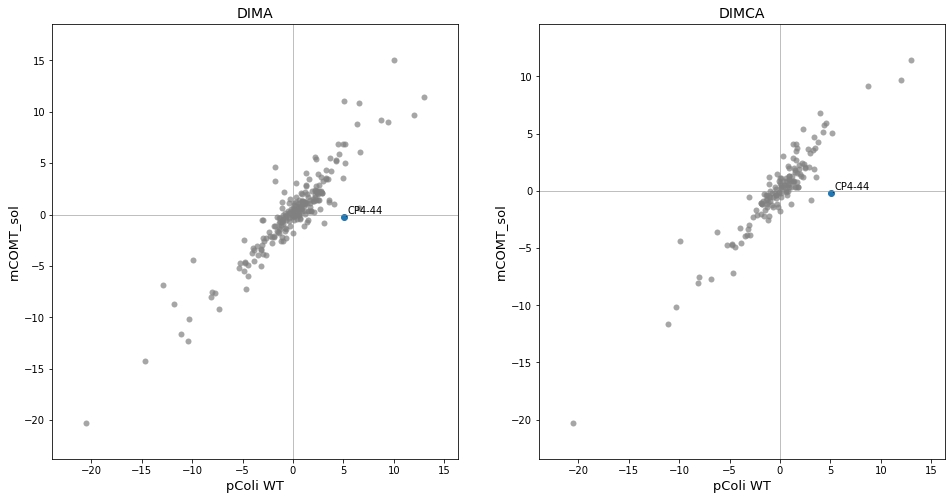

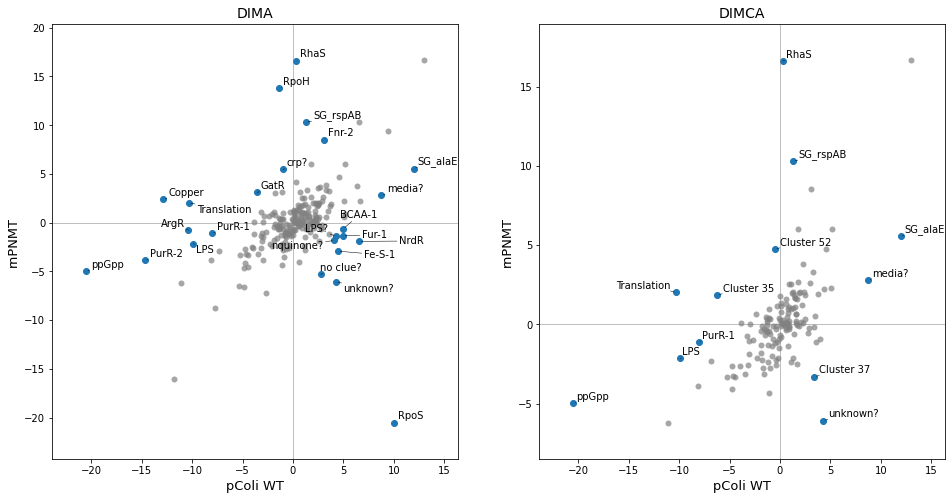

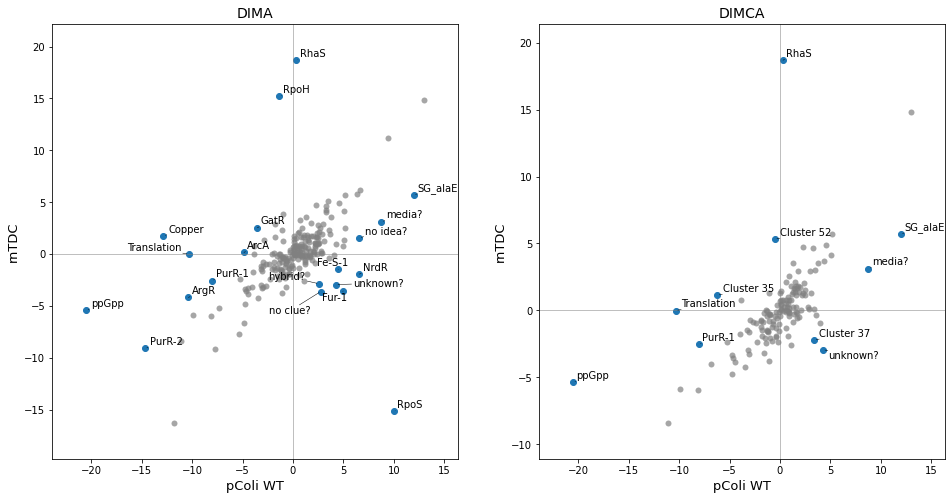

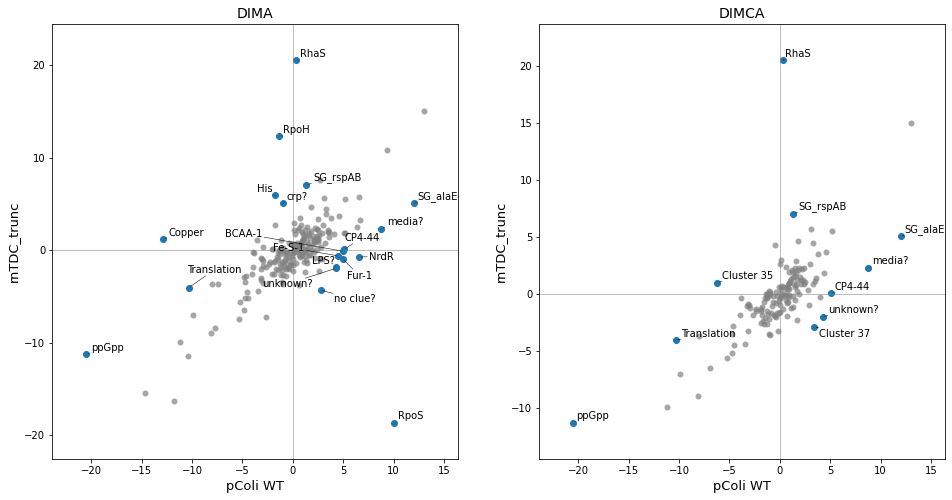

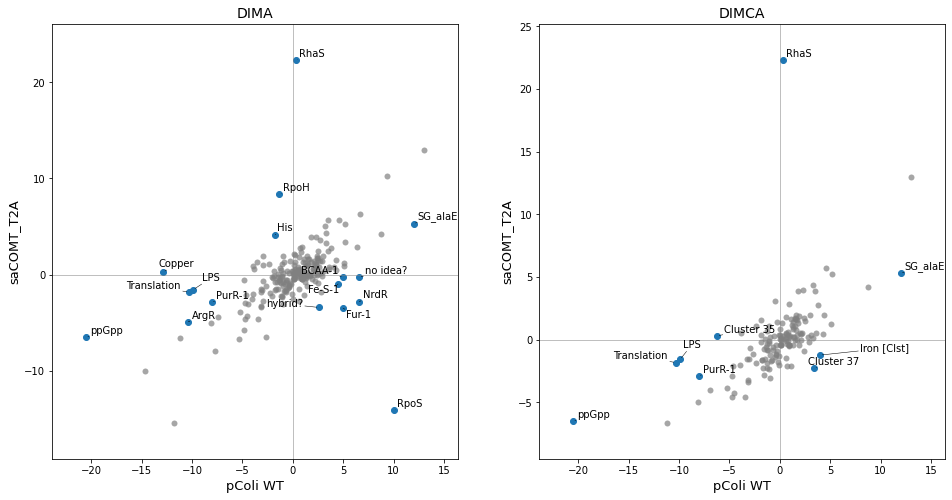

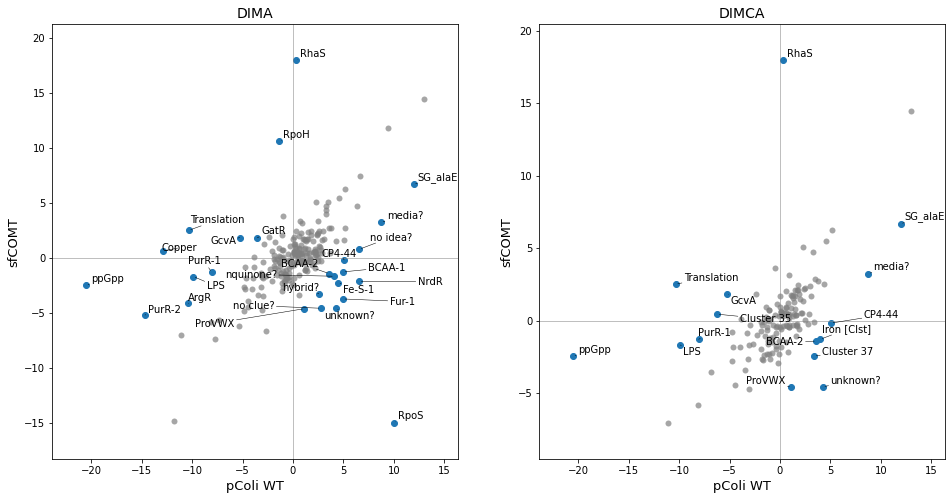

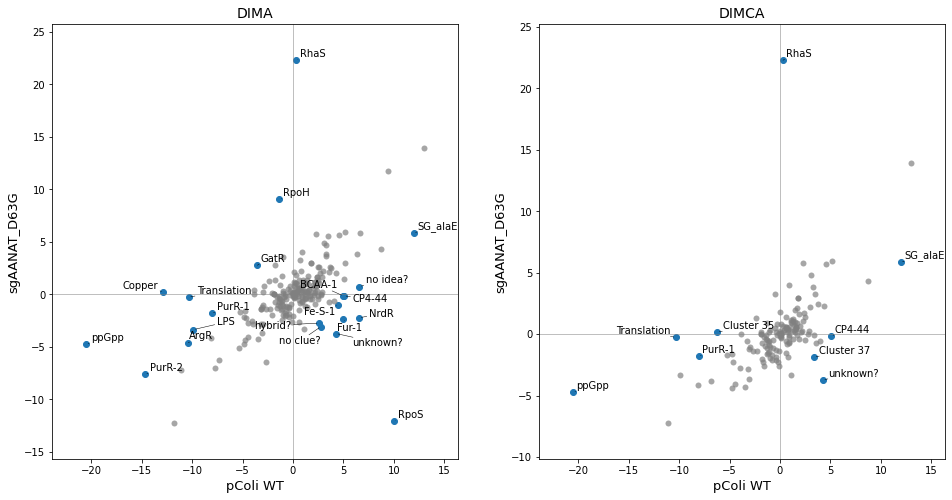

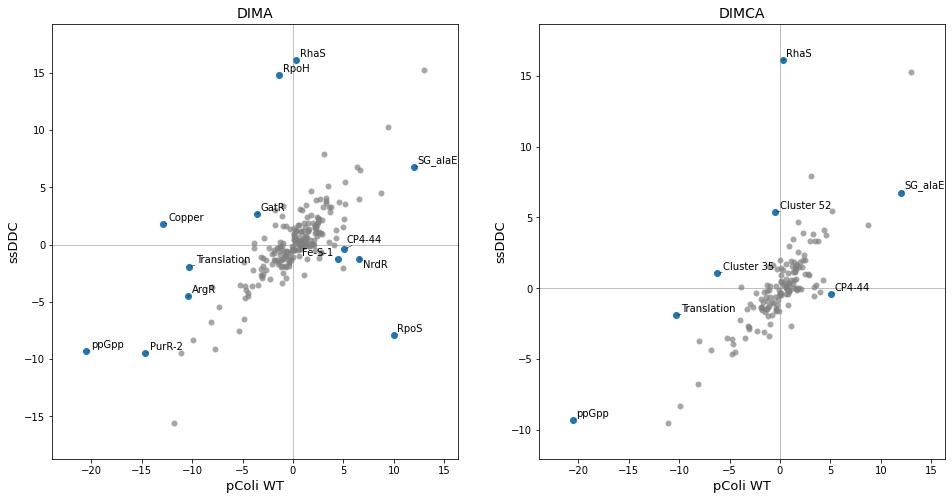

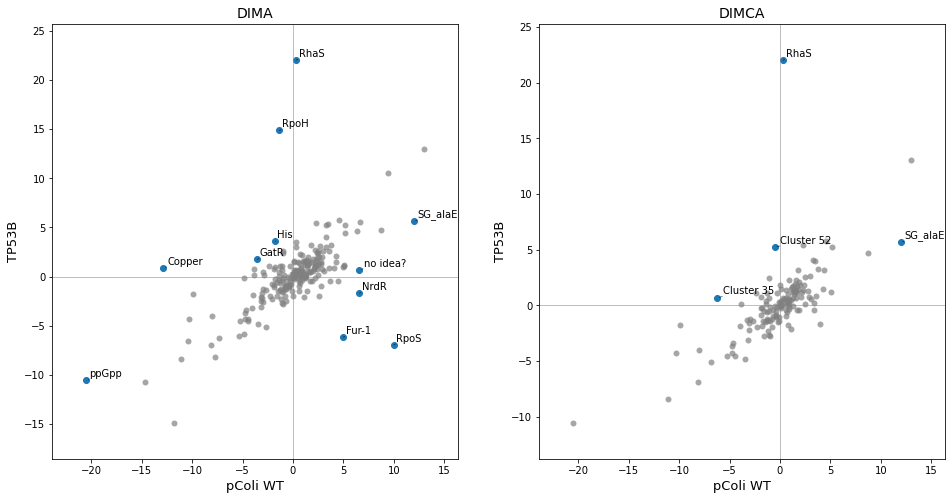

In [45]:
for pcoli_cond in pcoli_table['condition'].unique():
    if pcoli_cond != 'WT':
        _, (ax_dima, ax_dimca) = plt.subplots(1, 2, figsize=(16, 8))


        plot_dima(ica_data, 'pcoli:WT', f'pcoli:{pcoli_cond}', ax=ax_dima)
        ax_dima.set_xlabel('pColi WT', fontsize=13)
        ax_dima.set_ylabel(f'{pcoli_cond}', fontsize=13)
        ax_dima.set_title(f'DIMA', fontsize=14)

        cluster_activities(ica_data, show_best_clusters=False, show_thresholding=False, show_clustermap=False,
                          cluster_names={64: 'Flagella', 25: 'Iron', 61: 'BCAA', 39: 'Anaerobic', 56: 'Reduction',
                                        13: 'Sulfur', 24: 'Amino Acid', 36: 'AAA', 3: 'Iron/Anaerobic'},
                          dimca_sample1='pcoli:WT', dimca_sample2=f'pcoli:{pcoli_cond}',
                          ax=ax_dimca)

        ax_dimca.set_xlabel('pColi WT', fontsize=13)
        ax_dimca.set_ylabel(f'{pcoli_cond}', fontsize=13)
        ax_dimca.set_title('DIMCA', fontsize=14)

        plt.show()